In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
from pathlib import Path
from src.utils import constants
from src.eda import eda

In [3]:
PRODUCT_PATH = constants.DATA_RAW_DIR / 'products.csv'
INVENTORY_PATH = constants.DATA_RAW_DIR / 'inventory.csv'
TRANSACTIONS_PATH = constants.DATA_RAW_DIR / 'transactions.csv'

In [4]:
products = pd.read_csv(PRODUCT_PATH , parse_dates=["launch_date"])
transactions = pd.read_csv(TRANSACTIONS_PATH, parse_dates=["timestamp"])
inventory = pd.read_csv(INVENTORY_PATH , parse_dates=["date", "restock_date"])

Aim: we want to investigate the data to fufill the brief: As a senior data scientist candidate, your task is to develop a pricing optimization model that will help Temple & Webster maximize revenue across its product catalog. You will use historical sales data to understand price
elasticity and develop a systematic approach to pricing that accounts for various factors influencing
consumer purchasing decisions.

In [5]:
#Probally wanna structure the project in the folowing way. Dont know enough about the topic but I think this is a good start.

# 1) do some sort of demand forecasting
# 2) do some sort of elasticity modeling
# 3) use the 2 to do price optimization

# Lets structure our EDA to fufill these 3 tasks. 

In [6]:
#Lets first have look at how the data looks before we delve any deeper

In [7]:
products.head(10)

product_id  category_id  subcategory_id  brand_id  supplier_id  base_cost  \
0  PROD00001            4               2       102          201      54.85   
1  PROD00002            5               4       101          202      23.96   
2  PROD00003            3               4       104          201      42.25   
3  PROD00004            5               1       103          201     108.76   
4  PROD00005            5               2       102          202      74.03   
5  PROD00006            2               1       101          201     167.49   
6  PROD00007            3               3       105          201      91.87   
7  PROD00008            3               3       104          203      57.26   
8  PROD00009            3               1       102          201     127.26   
9  PROD00010            5               4       102          202     144.29   

   quality_score  avg_competitor_price  is_seasonal launch_date  
0            8.0             57.080568            0  2021-10-16  
1            3.0             29.922143            1  2020-04-24  
2           10.0             48.045622            0  2020-01-26  
3            2.0             94.458009            0  2020-10-08  
4            9.0             96.053235            0  2020-09-07  
5           10.0            178.145099            1  2020-08-16  
6            5.0             91.496011            0  2020-05-22  
7            7.0             64.678427            0  2020-04-14  
8            2.0            108.736882            0  2021-11-23  
9            9.0            161.355081            0  2021-07-12

In [8]:
transactions.head(10)

transaction_id product_id  timestamp   price  quantity  \
0      TXN000001  PROD00118 2022-09-25   54.58         3   
1      TXN000002  PROD00233 2022-07-02  266.63         1   
2      TXN000003  PROD00199 2023-08-18  178.76         2   
3      TXN000004  PROD00206 2022-09-29  205.39         3   
4      TXN000005  PROD00413 2022-02-09   91.81         5   
5      TXN000006  PROD00339 2022-04-22  135.26         4   
6      TXN000007  PROD00147 2023-09-03  243.01         3   
7      TXN000008  PROD00450 2023-03-21  102.55         5   
8      TXN000009  PROD00425 2022-12-20   53.69         3   
9      TXN000010  PROD00429 2022-11-18  116.60         1   

                                user_id  is_promotion promotion_type  \
0  f0b965a8-c814-4a7d-a609-be532367100d             1            NaN   
1  dd6b5c52-cfef-4e4d-9842-17f6807e5da7             1       Discount   
2  fc84a267-14d6-44b9-8977-37d070fb0c91             0            NaN   
3  99ed791f-4c44-4ce7-b0a2-921317579dc8             0            NaN   
4  23a9cfd3-2f00-491d-9e00-8bf13839ab14             1       Discount   
5  84156abb-f85a-48d9-b557-c6583b86aceb             0            NaN   
6  73566223-77fc-4c73-9a29-7bd0bdb2aae7             0            NaN   
7  a5908471-5acc-4730-845c-39f88d1e8b34             1        Unknown   
8  f8cbcbd9-972b-4c70-b842-b7566a4fba0f             1            NaN   
9  c57f5a74-a851-4906-9f0a-bf53e323978f             1         Bundle   

      platform  
0   Mobile App  
1   Mobile App  
2   Mobile App  
3   Mobile App  
4   Mobile App  
5          Web  
6   Mobile App  
7          Web  
8  Marketplace  
9   Mobile App

In [9]:
inventory.head(10)

product_id       date  stock_level  days_in_stock restock_date  \
0  PROD00001 2022-01-01          119              0          NaT   
1  PROD00001 2022-01-02          147              1          NaT   
2  PROD00001 2022-01-03          163              2          NaT   
3  PROD00001 2022-01-04          143              3          NaT   
4  PROD00001 2022-01-05          167              4          NaT   
5  PROD00001 2022-01-06          175              5          NaT   
6  PROD00001 2022-01-07          156              6          NaT   
7  PROD00001 2022-01-08          149              7          NaT   
8  PROD00001 2022-01-09          134              8          NaT   
9  PROD00001 2022-01-10          152              9          NaT   

   restock_quantity  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
5                 0  
6                 0  
7                 0  
8                 0  
9                 0

In [10]:
#Ensure that the date columns are in datetime format
products['launch_date'] = pd.to_datetime(products['launch_date'])
transactions['timestamp'] = pd.to_datetime(transactions['timestamp'])
inventory['date'] = pd.to_datetime(inventory['date'])


In [11]:
# Lets check the dataframes for any null values
print(products.isnull().sum())
print(transactions.isnull().sum())
print(inventory.isnull().sum())

product_id               0
category_id              0
subcategory_id           0
brand_id                 0
supplier_id              0
base_cost                0
quality_score           25
avg_competitor_price    25
is_seasonal              0
launch_date              0
dtype: int64
transaction_id        0
product_id            0
timestamp             0
price                 0
quantity              0
user_id               0
is_promotion          0
promotion_type    39944
platform              0
dtype: int64
product_id               0
date                     0
stock_level              0
days_in_stock            0
restock_date        356232
restock_quantity         0
dtype: int64


In [12]:
products['subcategory_identifier'] = products["category_id"].astype(str) + "_" + products["subcategory_id"].astype(str)

In [13]:
products['subcategory_identifier'].value_counts()

subcategory_identifier
1_1    34
5_1    32
4_3    30
1_2    30
4_4    29
4_1    27
2_3    27
4_2    26
2_1    26
1_3    25
5_2    25
3_1    24
3_2    24
3_3    23
2_4    22
3_4    20
2_2    20
1_4    20
5_3    19
5_4    17
Name: count, dtype: int64

In [14]:
products['subcategory_id'].value_counts()

subcategory_id
1    143
2    125
3    124
4    108
Name: count, dtype: int64

In [15]:
transactions['promotion_type'].value_counts()

promotion_type
Discount         3782
Unknown          2500
Bundle           1909
Free Shipping    1865
Name: count, dtype: int64

In [16]:
# look at percentage of null values in promotion_type column
transactions['promotion_type'].isnull().sum() / len(transactions) * 100

# in absence of any other information, we can assume that the null values in promotion_type column are not part of any promotion
transactions['promotion_type'] = transactions['promotion_type'].fillna('No Promotion')

# Unsure of how to proceed with Unknown promotion types, we will treat them as a separate category for now unless we can impute them later

In [17]:
# Restock Date is mostly null, -- need to have a look at how much of the data is null
print(inventory['restock_date'].isnull().sum() / inventory.shape[0] * 100)
# 99.9% of the data is null, so we can drop this column
inventory.drop(columns=["restock_date"], inplace=True)

97.59780821917808


In [18]:
num_categories = products['product_id'].nunique()
print(f"Number of unique categories in products: {num_categories}")

Number of unique categories in products: 500


In [19]:
num_categories = products['category_id'].nunique()
print(f"Number of unique categories in products: {num_categories}")

Number of unique categories in products: 5


In [20]:
# Check that all transaction product_ids exist in products and inventory

# Check for missing product_ids in products
missing_in_products = set(transactions['product_id']) - set(products['product_id'])
print(f"Number of transaction product_ids missing in products: {len(missing_in_products)}")

# Check for missing product_ids in inventory
missing_in_inventory = set(transactions['product_id']) - set(inventory['product_id'])
print(f"Number of transaction product_ids missing in inventory: {len(missing_in_inventory)}")

Number of transaction product_ids missing in products: 0
Number of transaction product_ids missing in inventory: 0


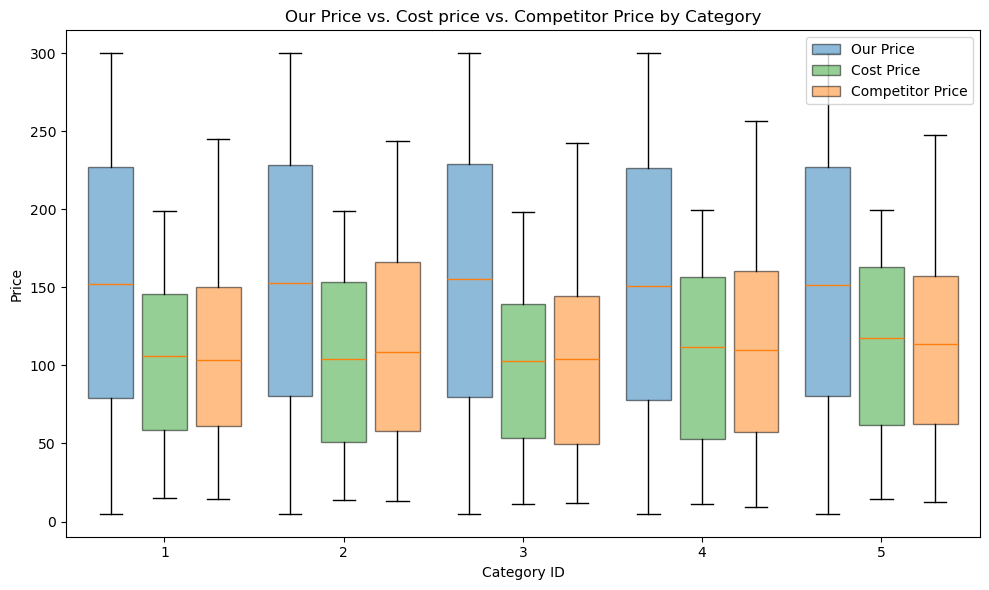

In [21]:

# 1. Merge transactions & products (include base_cost as “cost_price”)
tx_prod = transactions.merge(
    products[['product_id','category_id','avg_competitor_price','base_cost']],
    on='product_id',
    how='left'
).rename(columns={'base_cost':'cost_price'})

# 2. Get sorted list of categories
cats = sorted(tx_prod['category_id'].unique())

# 3. Build data lists
price_data = [
    tx_prod.loc[tx_prod['category_id']==c, 'price'].dropna()
    for c in cats
]
cost_data = [
    tx_prod.loc[tx_prod['category_id']==c, 'cost_price'].dropna()
    for c in cats
]
comp_data = [
    tx_prod.loc[tx_prod['category_id']==c, 'avg_competitor_price'].dropna()
    for c in cats
]

# 4. Define positions for each box
pos_price = [c*2 - 0.6 for c in cats]
pos_cost  = [c*2       for c in cats]
pos_comp  = [c*2 + 0.6 for c in cats]

# 5. Plot
plt.figure(figsize=(10,6))

bp1 = plt.boxplot(
    price_data,
    positions=pos_price,
    widths=0.5,
    patch_artist=True,
    boxprops=dict(facecolor='C0', alpha=0.5)
)

bp2 = plt.boxplot(
    cost_data,
    positions=pos_cost,
    widths=0.5,
    patch_artist=True,
    boxprops=dict(facecolor='C2', alpha=0.5)
)

bp3 = plt.boxplot(
    comp_data,
    positions=pos_comp,
    widths=0.5,
    patch_artist=True,
    boxprops=dict(facecolor='C1', alpha=0.5)
)

# 6. Formatting
plt.xticks([c*2 for c in cats], cats)
plt.xlabel('Category ID')
plt.ylabel('Price')
plt.title('Our Price vs. Cost price vs. Competitor Price by Category')

# 7. Legend
plt.legend(
    [bp1['boxes'][0], bp2['boxes'][0], bp3['boxes'][0]],
    ['Our Price', 'Cost Price', 'Competitor Price'],
    loc='upper right'
)

plt.tight_layout()
plt.show()


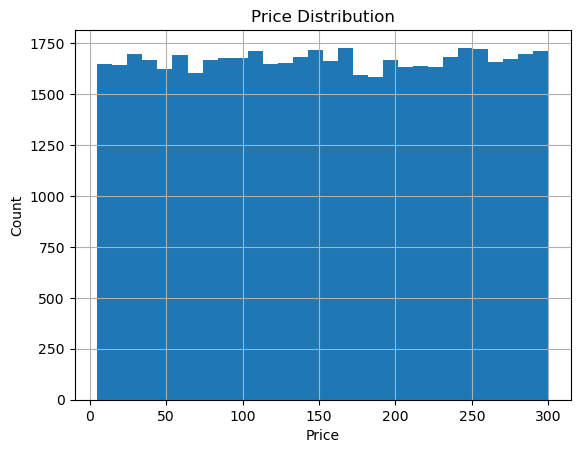

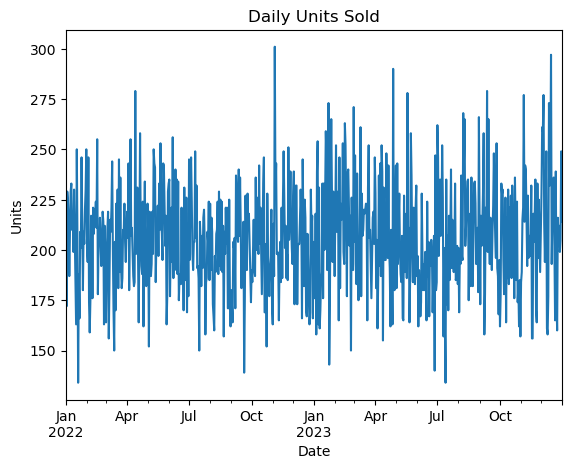

In [22]:

plt.figure()
transactions['price'].hist(bins=30)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

# 3.2 Sales time-series
sales_ts = transactions.set_index('timestamp').resample('D')['quantity'].sum()
plt.figure()
sales_ts.plot()
plt.title("Daily Units Sold")
plt.xlabel("Date")
plt.ylabel("Units")
plt.show()


In [23]:
# Check if price is consistent for each product in the transactions DataFrame
price_consistency = transactions.groupby('product_id')['price'].nunique()
inconsistent_products = price_consistency[price_consistency > 1]

print(f"Number of products with inconsistent prices: {len(inconsistent_products)}")
print("Sample of products with inconsistent prices:")
print(inconsistent_products.head())

# Now that we know that our prices shift over time, we must ensure that any modelling we do takes this into account

Number of products with inconsistent prices: 500
Sample of products with inconsistent prices:
product_id
PROD00001    95
PROD00002    85
PROD00003    85
PROD00004    98
PROD00005    94
Name: price, dtype: int64


In [24]:
# Calculate price variance for each product_id in transactions
price_variance = transactions.groupby('product_id')['price'].var().sort_values(ascending=False)

# Show top 10 SKUs with highest price variance
top_var_skus = price_variance.head(10)
print("Top 10 SKUs with highest price variance:")
print(top_var_skus)

# KEEP IN MIND THAT BY LOOKING AT THE PRICE VARIANCE, WE MIGHT BE LOOKING AT JUST SEASONAL ITEMS; this might be a trap lets look also at the middle of the pack 

Top 10 SKUs with highest price variance:
product_id
PROD00376    9018.207313
PROD00045    8889.518010
PROD00285    8769.150381
PROD00284    8757.261203
PROD00206    8753.357514
PROD00486    8731.382122
PROD00003    8721.790310
PROD00420    8713.999123
PROD00229    8709.840643
PROD00158    8639.239724
Name: price, dtype: float64


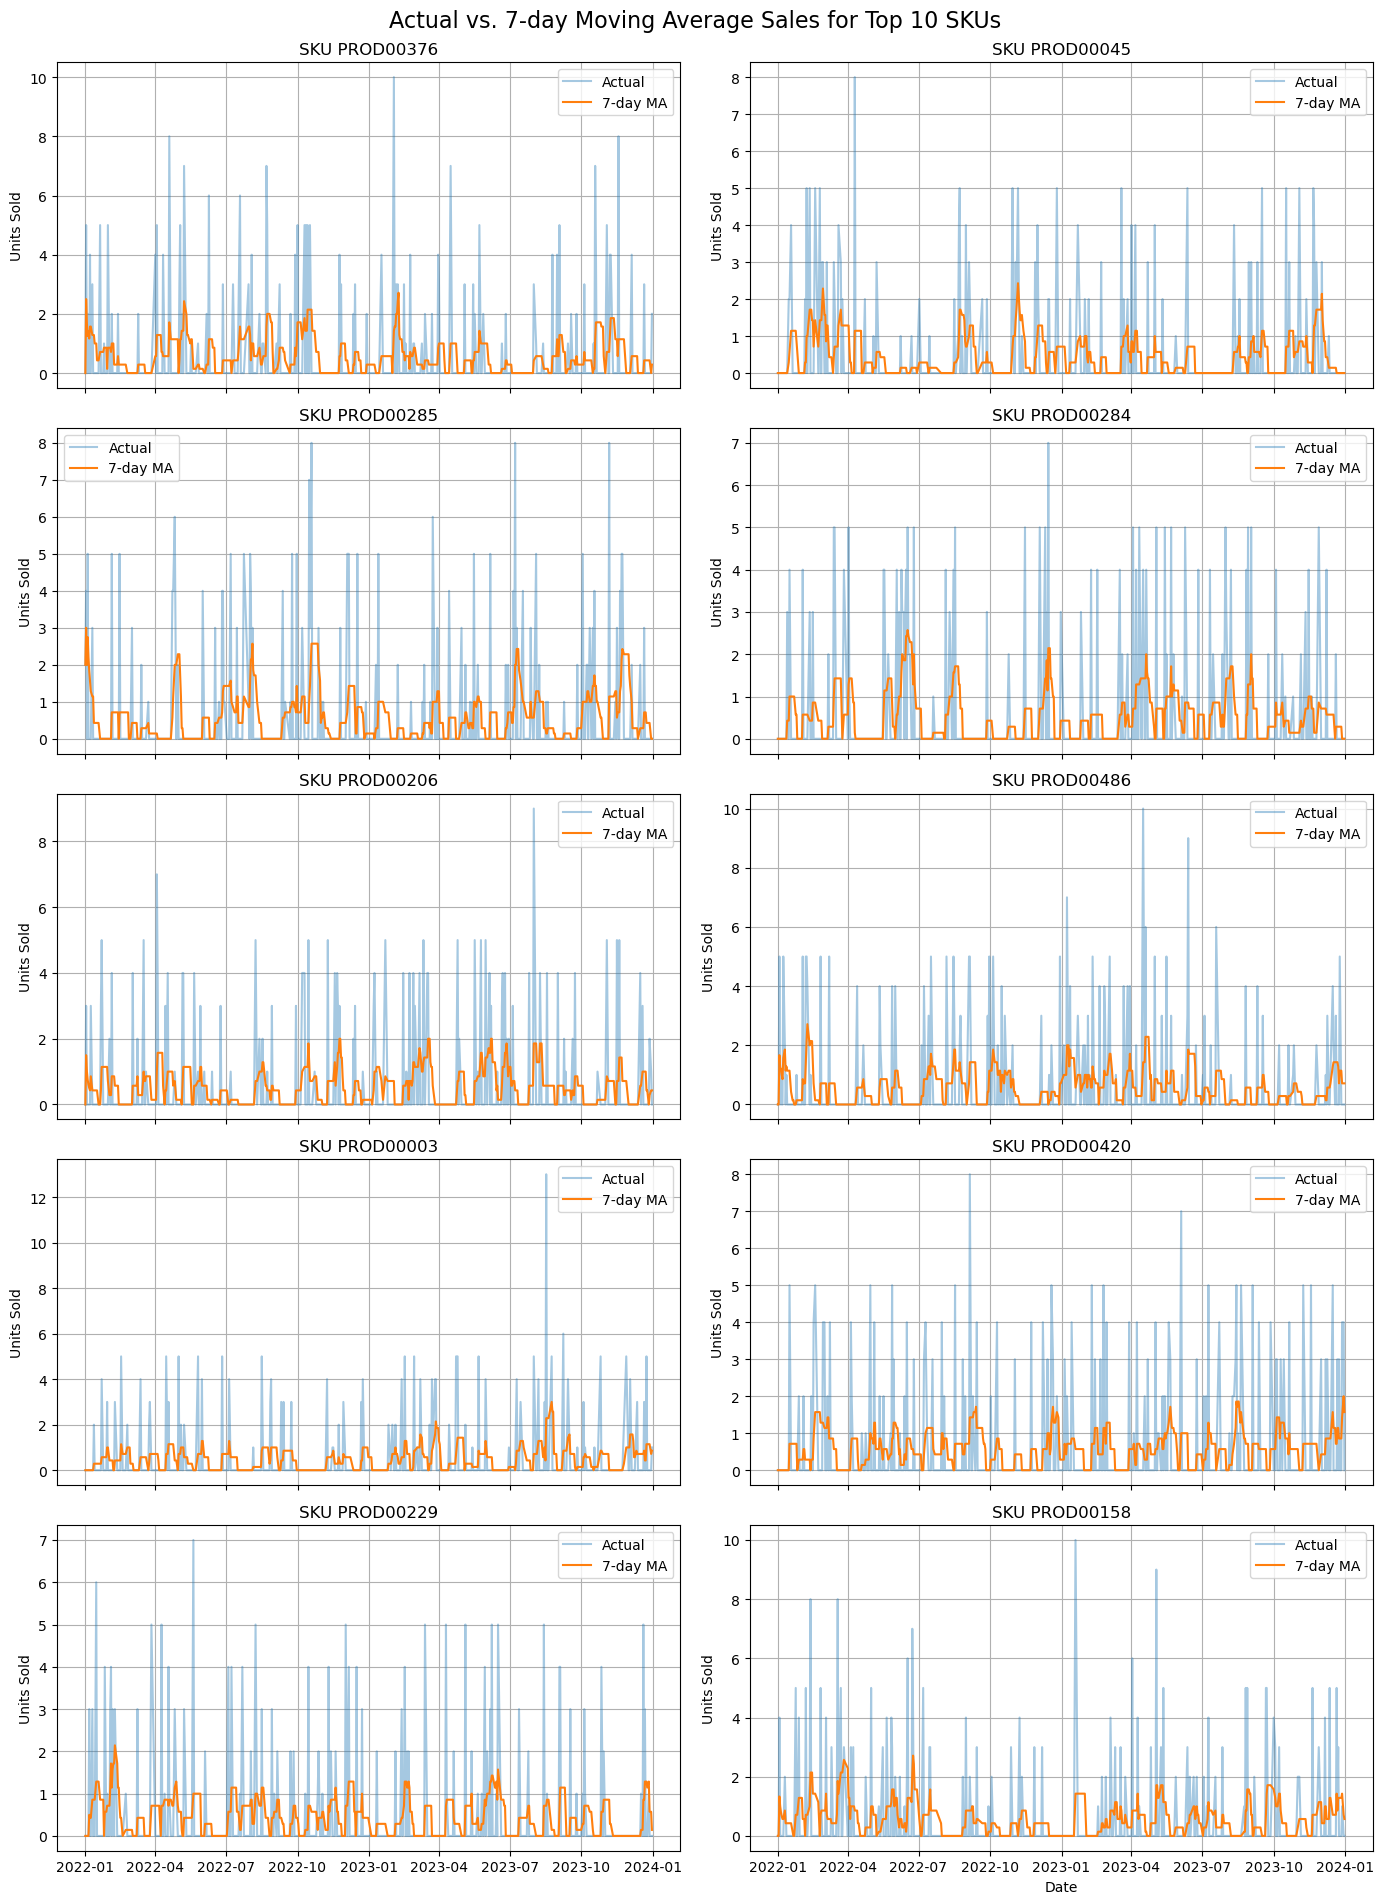

In [25]:


# 1. Identify top SKUs and compute daily sales + 7-day MA
top_skus = top_var_skus.index.tolist()
sku_sales = transactions[transactions['product_id'].isin(top_skus)]
daily_sku_sales = (
    sku_sales
    .groupby([transactions['timestamp'].dt.date, 'product_id'])['quantity']
    .sum()
    .unstack(fill_value=0)
)
daily_sku_sales_ma = daily_sku_sales.rolling(window=7, min_periods=1).mean()

# 2. Create subplots (5 rows x 2 cols)
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 20), sharex=True)
axes = axes.flatten()

# 3. Plot each SKU: raw vs. MA
for ax, sku in zip(axes, top_skus):
    ax.plot(daily_sku_sales.index, daily_sku_sales[sku],      label='Actual', alpha=0.4)
    ax.plot(daily_sku_sales_ma.index, daily_sku_sales_ma[sku], label='7-day MA')
    ax.set_title(f'SKU {sku}')
    ax.set_ylabel('Units Sold')
    ax.legend()
    ax.grid(True)

# 4. Clean up any unused axes
for ax in axes[len(top_skus):]:
    fig.delaxes(ax)

# 5. Overall formatting
fig.suptitle('Actual vs. 7-day Moving Average Sales for Top 10 SKUs', fontsize=16, y=0.95)
plt.xlabel('Date')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [26]:
# Might need to aggregate the data to weekly or monthly or use zero-inflated Poisson regression to model the data. Let's look at aggregation first

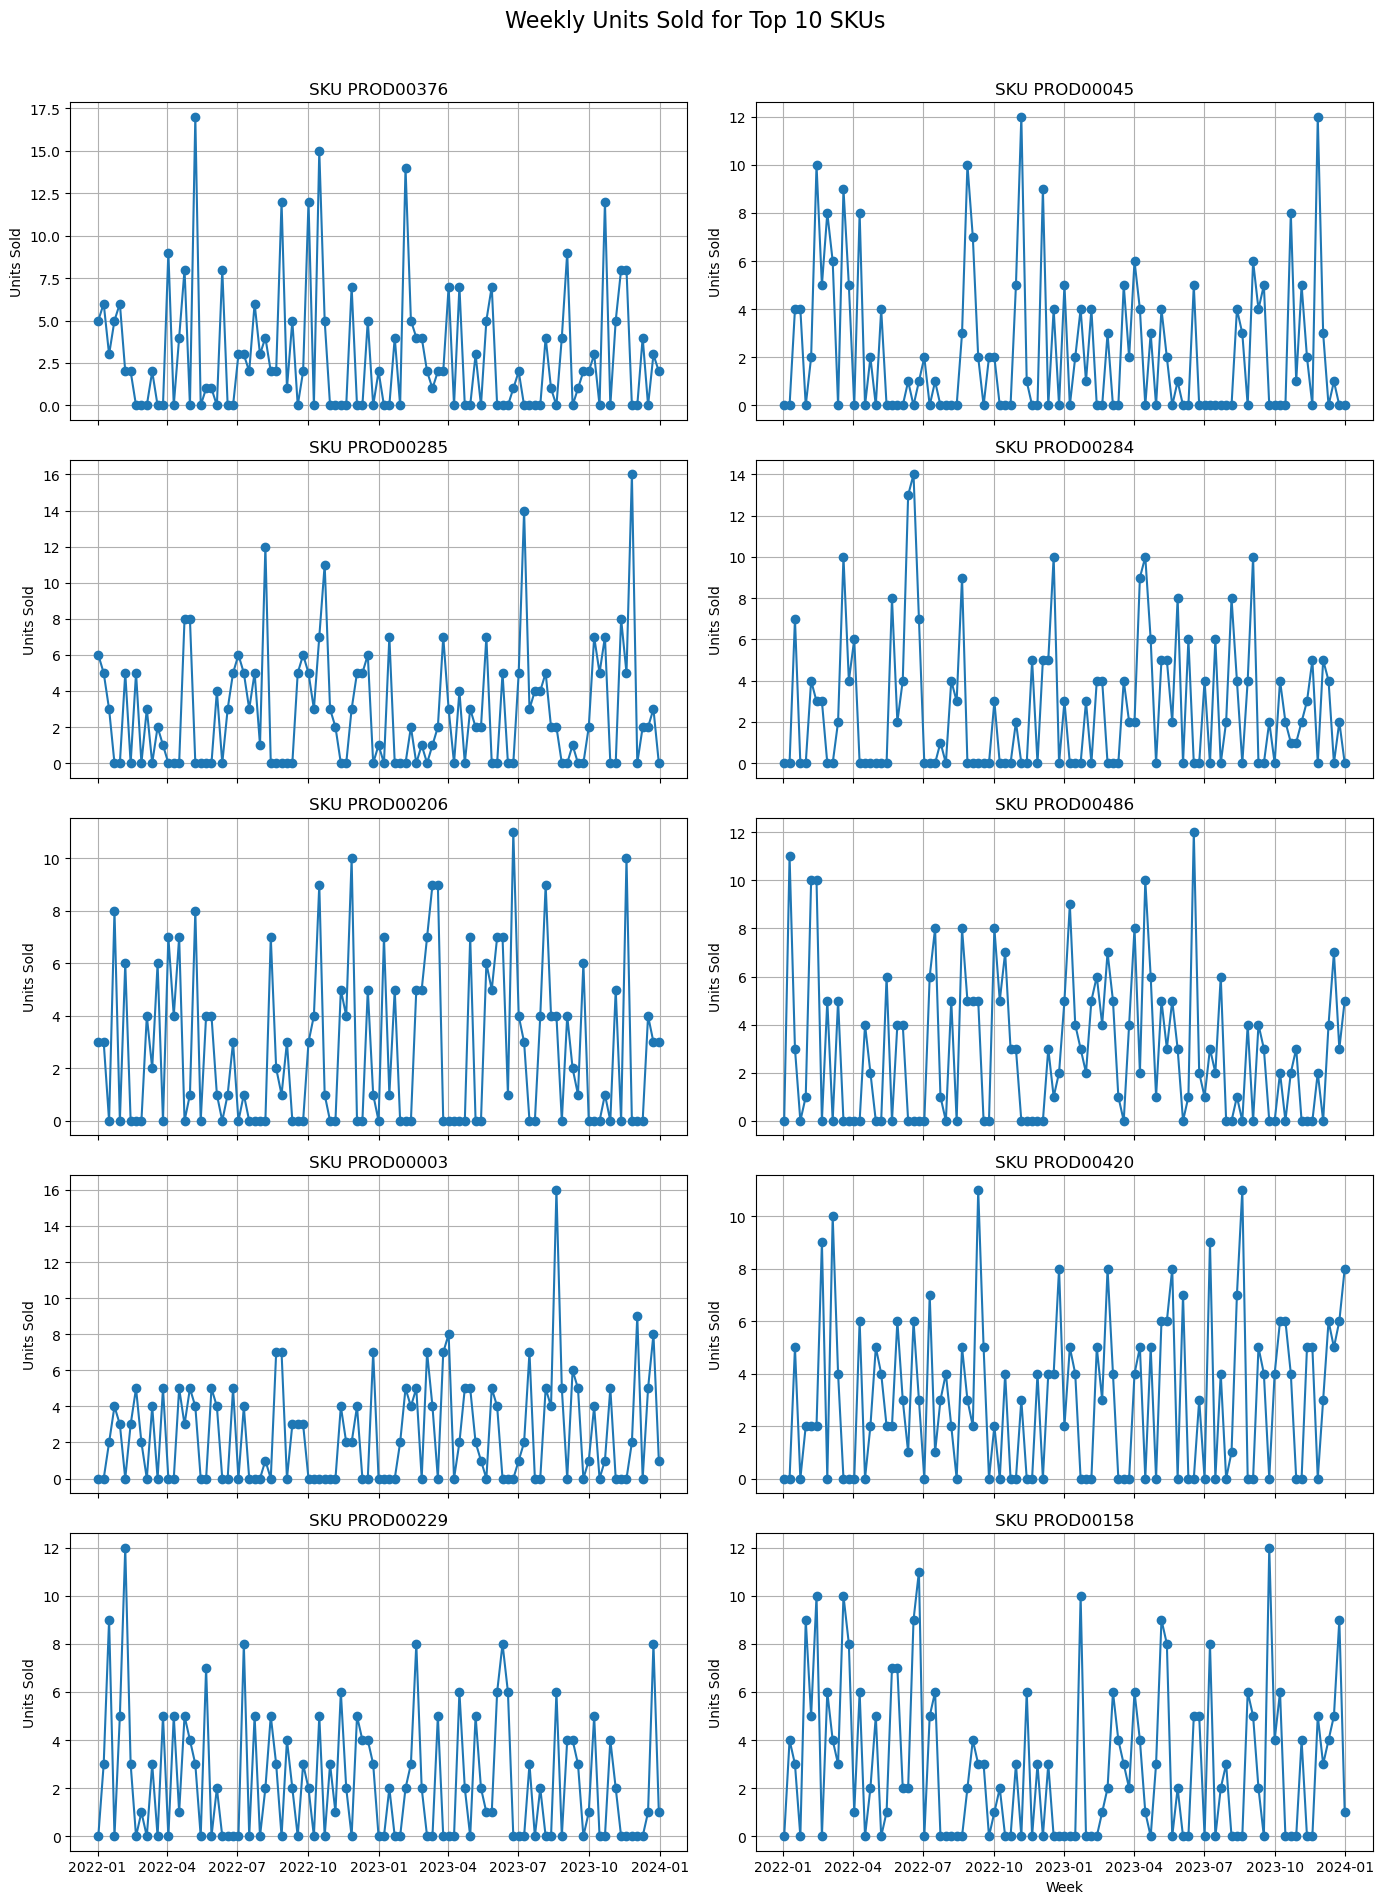

In [27]:
# 2. Filter to top SKUs
sku_sales = transactions[transactions['product_id'].isin(top_skus)]

# 3. Group by product_id, resample on timestamp, then unstack by product_id
daily_sku_sales = (
    sku_sales
    .set_index('timestamp')                       # index=DatetimeIndex
    .groupby('product_id')['quantity']            # group within each SKU
    .resample('D')                                # daily bins
    .sum()                                        # sum qty per day
    .unstack(level=0, fill_value=0)               # columns=product_id
)

# now daily_sku_sales.index is DatetimeIndex, columns are SKUs

# 4. Weekly aggregation
weekly_actual = daily_sku_sales.resample('W').sum()

# 5. Plot
fig, axes = plt.subplots(5, 2, figsize=(14, 20), sharex=True)
axes = axes.flatten()
for ax, sku in zip(axes, top_skus):
    ax.plot(weekly_actual.index, weekly_actual[sku], marker='o')
    ax.set_title(f'SKU {sku}')
    ax.set_ylabel('Units Sold')
    ax.grid(True)

for ax in axes[len(top_skus):]:
    fig.delaxes(ax)

fig.suptitle('Weekly Units Sold for Top 10 SKUs', y=0.95, fontsize=16)
plt.xlabel('Week')
plt.tight_layout(rect=[0,0,1,0.94])
plt.show()

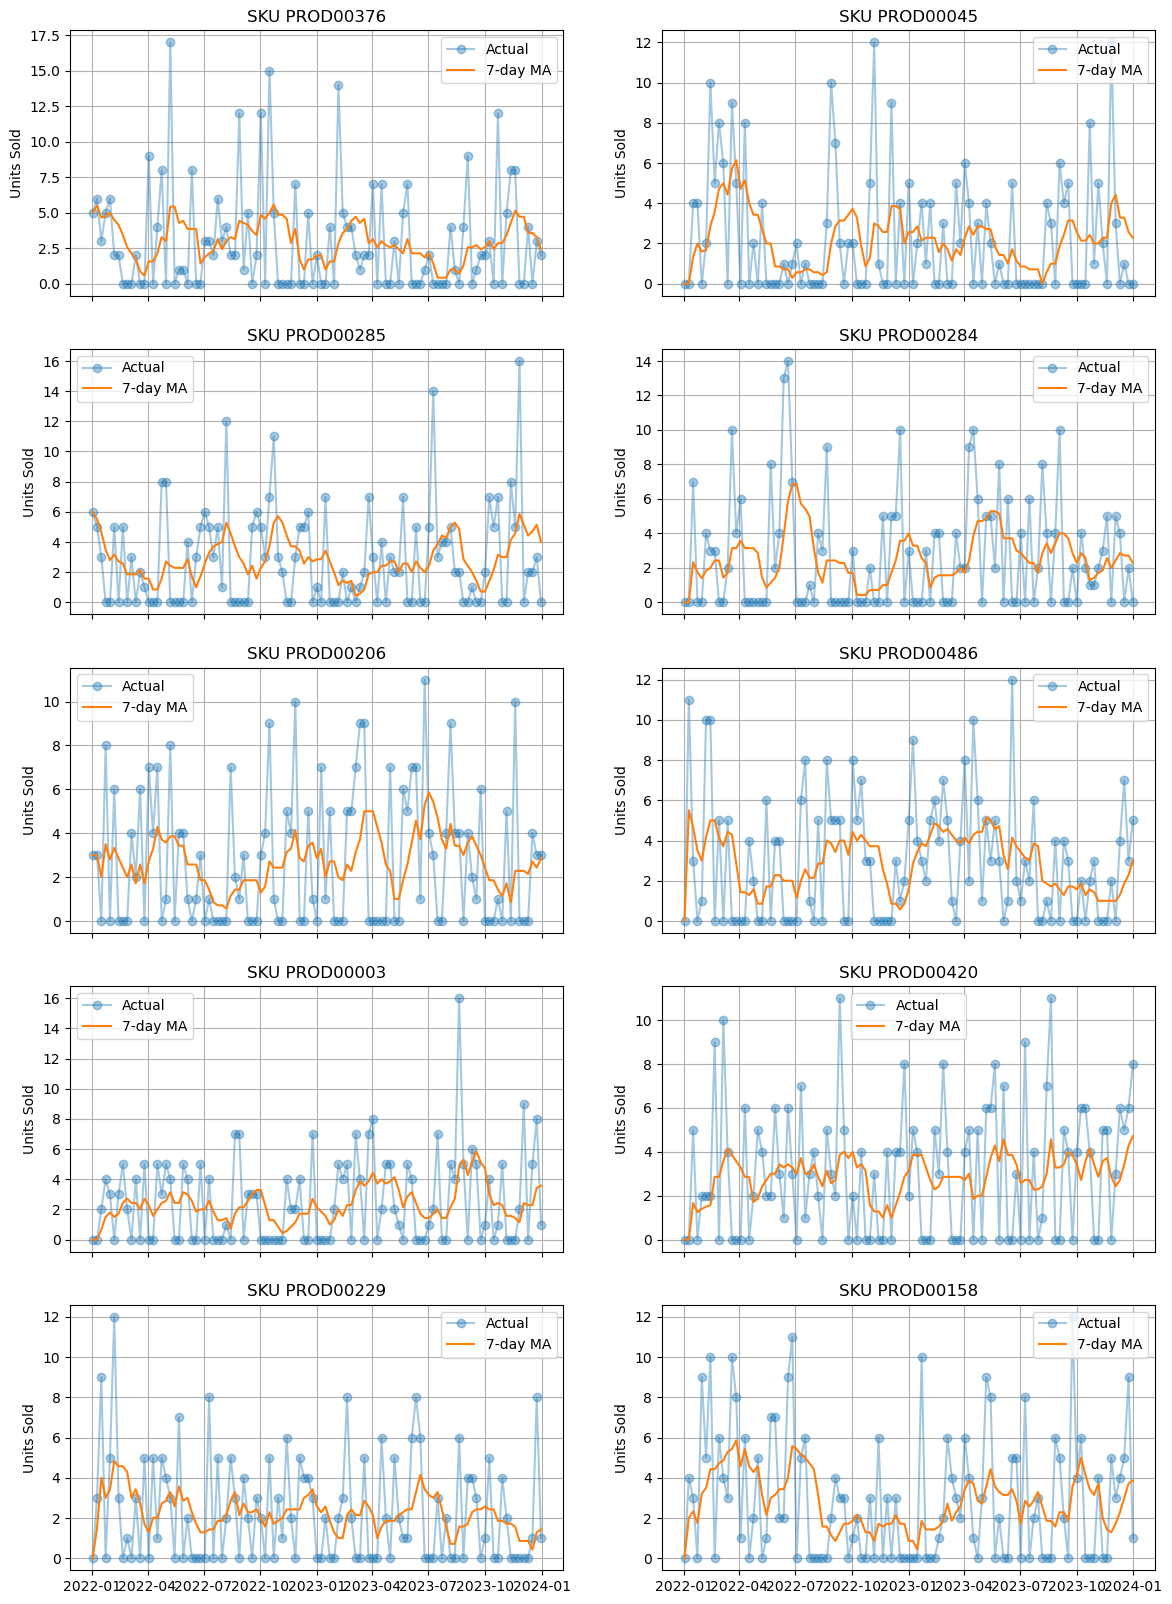

In [28]:

# 4. Weekly aggregation 
weekly_actual = daily_sku_sales.resample('W').sum()
weekly_actual_ma = weekly_actual.rolling(window=7, min_periods=1).mean()
# 5. Plot

fig, axes = plt.subplots(5, 2, figsize=(14, 20), sharex=True) 
axes = axes.flatten()                   
for ax, sku in zip(axes, top_skus):
    ax.plot(weekly_actual.index, weekly_actual[sku], marker='o', label='Actual', alpha=0.4)
    ax.plot(weekly_actual_ma.index, weekly_actual_ma[sku], label='7-day MA')
    ax.set_title(f'SKU {sku}')
    ax.set_ylabel('Units Sold')
    ax.legend()
    ax.grid(True)   

C:\Users\jyuey\AppData\Local\Temp\ipykernel_13256\1475918661.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_actual = daily_sku_sales.resample('M').sum()


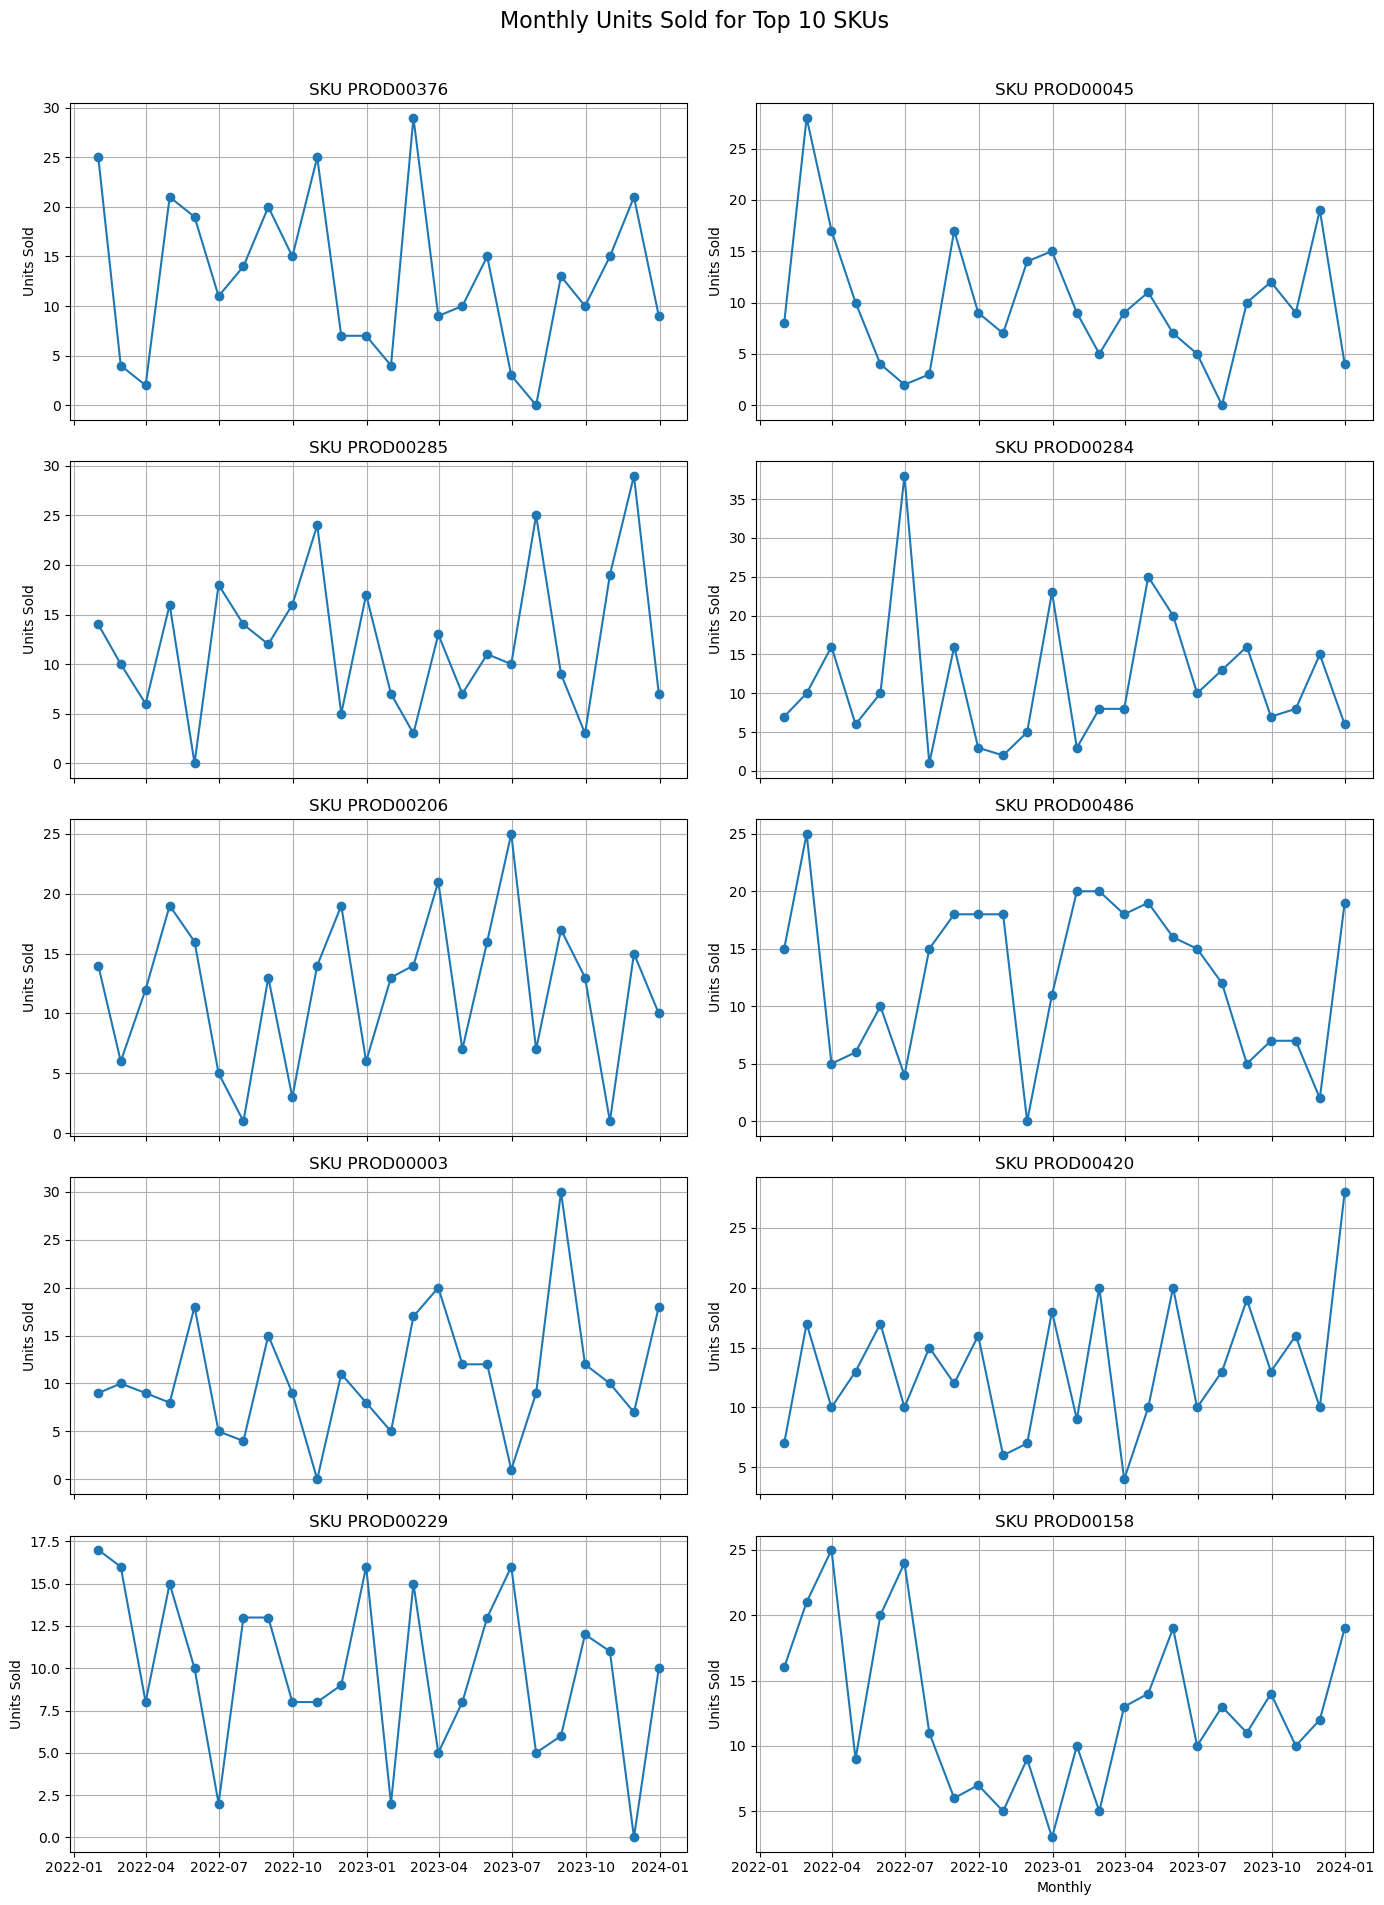

In [29]:
# Yeah, this is still heavily 0 inflated. Let's try months and have alook at the distribution of sales
monthly_actual = daily_sku_sales.resample('M').sum()
# 5. Plot
fig, axes = plt.subplots(5, 2, figsize=(14, 20), sharex=True)
axes = axes.flatten()
for ax, sku in zip(axes, top_skus):
    ax.plot(monthly_actual.index, monthly_actual[sku], marker='o')
    ax.set_title(f'SKU {sku}')
    ax.set_ylabel('Units Sold')
    ax.grid(True)

for ax in axes[len(top_skus):]:
    fig.delaxes(ax)

fig.suptitle('Monthly Units Sold for Top 10 SKUs', y=0.95, fontsize=16)
plt.xlabel('Monthly')
plt.tight_layout(rect=[0,0,1,0.94])
plt.show()

In [30]:
# I think we will lose a lot of information if we aggregate to monthly. I think the sensible thing to do is to use a zero-inflated model on a weekly basis. 

# Lets look at the middle of the pack and see if we can find any patterns there and maybe if it is as zero inflated as the top variance products

In [31]:
# Get the product(s) with median price variance
median_var = price_variance.median()
middle_products = price_variance[price_variance.between(
    price_variance.quantile(0.49), price_variance.quantile(0.51)
)]
print("Median price variance:", median_var)
print("Products in the middle of the pack for price variance:")
print(middle_products)

Median price variance: 7263.548905001155
Products in the middle of the pack for price variance:
product_id
PROD00012    7278.310124
PROD00283    7272.094785
PROD00354    7271.905144
PROD00423    7271.130131
PROD00019    7264.497326
PROD00416    7262.600484
PROD00043    7258.475821
PROD00365    7258.462835
PROD00389    7255.033450
PROD00372    7251.379946
Name: price, dtype: float64


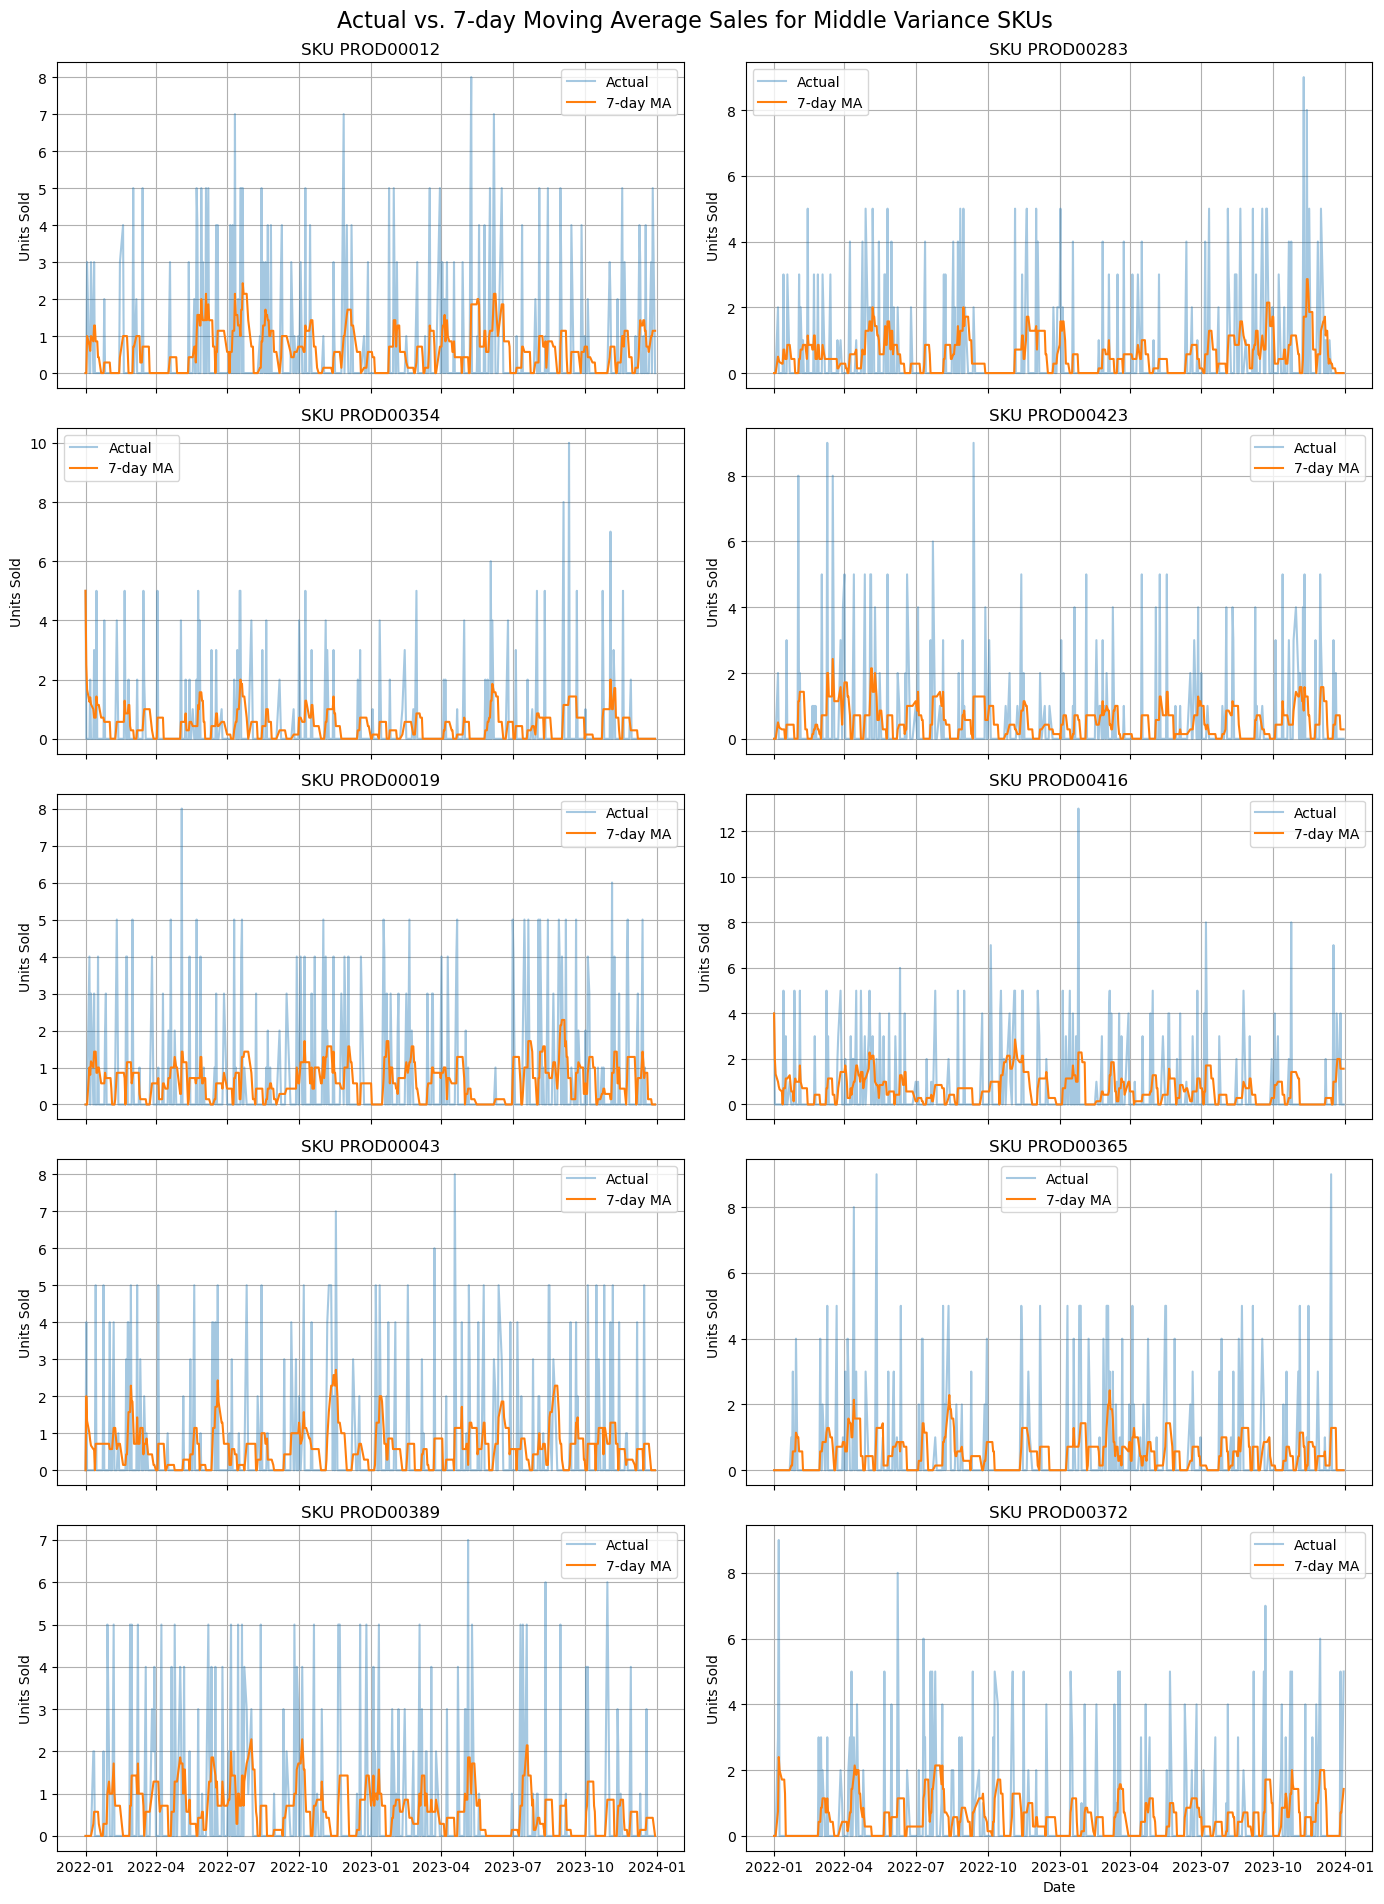

In [32]:
#Plot actual vs. 7-day moving average sales for middle variance products (middle_products)
middle_skus = middle_products.index.tolist()
middle_sku_sales = transactions[transactions['product_id'].isin(middle_skus)]
middle_daily_sales = (
    middle_sku_sales
    .groupby([middle_sku_sales['timestamp'].dt.date, 'product_id'])['quantity']
    .sum()
    .unstack(fill_value=0)
)
middle_daily_sales_ma = middle_daily_sales.rolling(window=7, min_periods=1).mean()

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 20), sharex=True)
axes = axes.flatten()

for ax, sku in zip(axes, middle_skus):
    ax.plot(middle_daily_sales.index, middle_daily_sales[sku], label='Actual', alpha=0.4)
    ax.plot(middle_daily_sales_ma.index, middle_daily_sales_ma[sku], label='7-day MA')
    ax.set_title(f'SKU {sku}')
    ax.set_ylabel('Units Sold')
    ax.legend()
    ax.grid(True)

for ax in axes[len(middle_skus):]:
    fig.delaxes(ax)

fig.suptitle('Actual vs. 7-day Moving Average Sales for Middle Variance SKUs', fontsize=16, y=0.95)
plt.xlabel('Date')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [33]:
# Yeah no chance here, we have to stick with ZIP regression.

In [34]:
def seasonality_checks_daily(daily_sales: pd.DataFrame, skus: list = None):
    """
    daily_sales: DataFrame indexed by dates (any Index that can be coerced to DatetimeIndex),
                 columns = product_id strings, values = units sold.
    skus:        Optional list of product_id columns to include.
    """
    # 1. Copy & coerce index
    df = daily_sales.copy()
    df.index = pd.to_datetime(df.index)         # force to DatetimeIndex
    if not isinstance(df.index, pd.DatetimeIndex):
        raise ValueError("Could not convert daily_sales.index to DatetimeIndex")

    # 2. Filter SKUs if given
    if skus is not None:
        missing = set(skus) - set(df.columns)
        if missing:
            raise KeyError(f"SKUs not found in columns: {missing}")
        df = df[skus]

    # 3. Melt into long form
    df_long = (
        df
        .reset_index()                            # brings date into a column named by df.index.name or "index"
        .melt(id_vars=df.index.name or 'index',   # whichever that column is
              var_name='product_id',
              value_name='UnitsSold')
        .rename(columns={df.index.name or 'index': 'Date'})
    )

    # 4. Calendar features
    df_long['Weekday'] = df_long['Date'].dt.day_name()
    df_long['Month']   = df_long['Date'].dt.month_name()

    # 5. Plot Weekday
    plt.figure(figsize=(12, 5))
    sns.boxplot(
        data=df_long,
        x='Weekday', y='UnitsSold', hue='product_id',
        order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    )
    plt.title('Weekday vs. Daily Units Sold')
    plt.xlabel('')
    plt.ylabel('Units Sold')
    plt.legend(title='SKU', bbox_to_anchor=(1.05,1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # 6. Plot Month
    plt.figure(figsize=(12, 5))
    sns.boxplot(
        data=df_long,
        x='Month', y='UnitsSold', hue='product_id',
        order=['January','February','March','April','May','June',
               'July','August','September','October','November','December']
    )
    plt.title('Month vs. Daily Units Sold')
    plt.xlabel('')
    plt.ylabel('Units Sold')
    plt.legend(title='SKU', bbox_to_anchor=(1.05,1), loc='upper left')
    plt.tight_layout()
    plt.show()

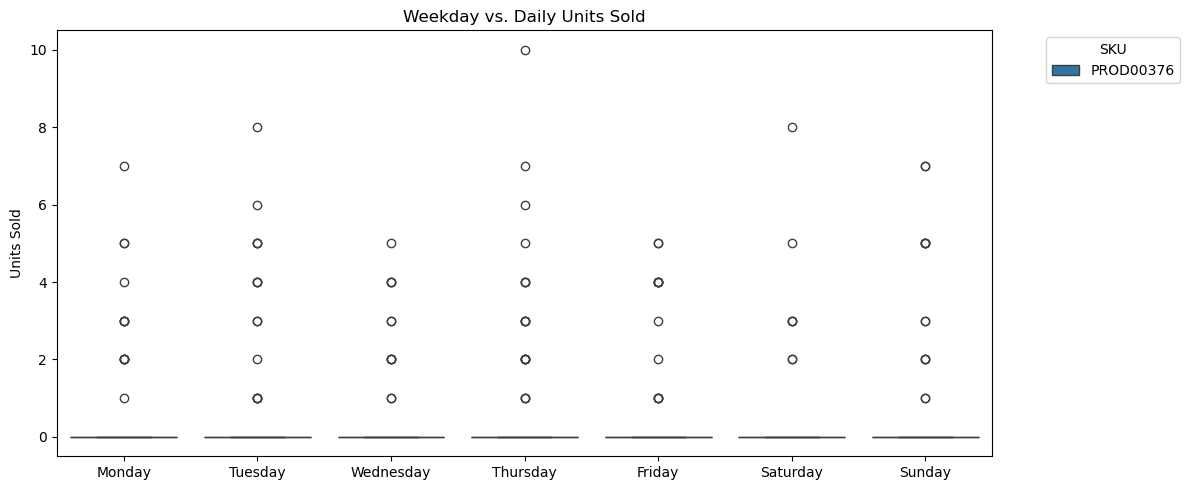

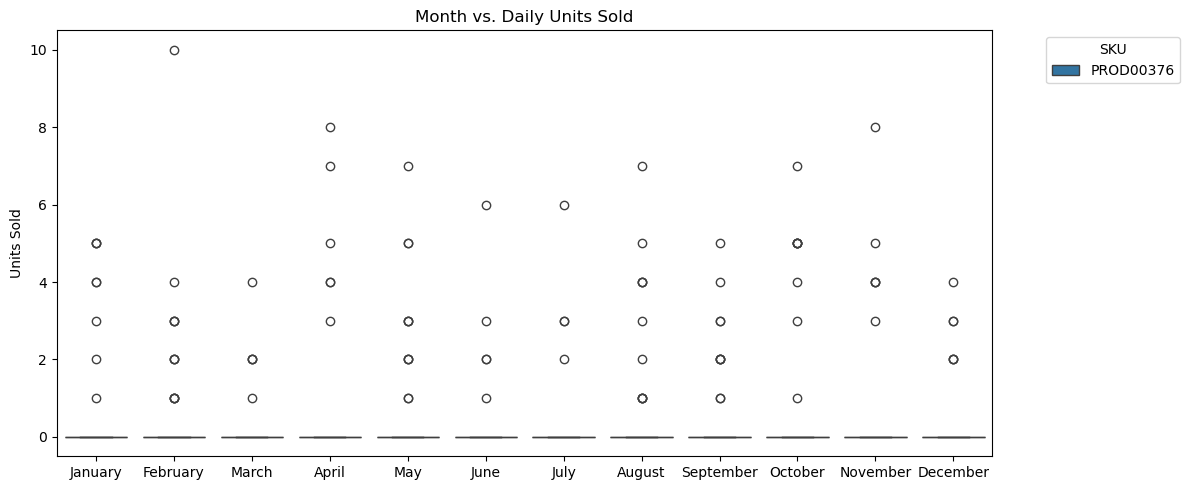

In [35]:
seasonality_checks_daily(daily_sku_sales, skus=[top_skus[0]])

In [36]:
def plot_sales_with_promotions(transactions: pd.DataFrame, sku: str) -> pd.DataFrame:
    """
    For a given SKU, aggregates transactions to daily metrics,
    plots daily sales with full-height promotion shading and
    a scatter of sales vs. average price, then returns the
    daily aggregated DataFrame.

    Parameters
    ----------
    transactions : pd.DataFrame
        DataFrame with at least columns ['product_id', 'timestamp', 'quantity', 'is_promotion', 'price']
    sku : str
        The product_id to filter on.

    Returns
    -------
    daily : pd.DataFrame
        DataFrame indexed by 'date' with columns:
        - 'quantity': total units sold
        - 'is_promotion': 1 if any promo on that day, else 0
        - 'price': average selling price
    """
    # 1. Filter for the SKU and ensure timestamp is datetime
    df = transactions[transactions['product_id'] == sku].copy()
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    # Normalize to date (00:00:00)
    df['date'] = df['timestamp'].dt.normalize()
    
    # 2. Aggregate to daily metrics
    daily = (
        df
        .groupby('date', as_index=True)
        .agg(
            quantity=('quantity', 'sum'),
            is_promotion=('is_promotion', 'max'),
            price=('price', 'mean')
        )
        .sort_index()
    )
    
    # 3. Plot daily sales line
    fig, ax = plt.subplots(figsize=(14, 5))
    ax.plot(daily.index, daily['quantity'],
            label='Daily Sales', color='C0', linewidth=2)
    
    # 4. Shade full-height promotion days
    ymin, ymax = ax.get_ylim()
    ax.fill_between(
        daily.index,
        ymin,
        ymax,
        where=daily['is_promotion'] == 1,
        color='orange',
        alpha=0.3,
        step='post',
        label='Promotion Period'
    )
    
    ax.set_title(f'Daily Sales with Promotion Overlay for SKU {sku}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Units Sold')
    ax.legend(loc='upper left')
    ax.grid(True)
    plt.tight_layout()
    plt.show()
    
    # 5. Scatter: daily sales vs. price
    plt.figure(figsize=(8, 5))
    sns.scatterplot(
        data=daily.reset_index(),
        x='price',
        y='quantity',
        hue='is_promotion',
        palette={0: 'C0', 1: 'orange'},
        alpha=0.8
    )
    plt.title(f'Daily Sales vs. Average Price for SKU {sku}')
    plt.xlabel('Average Price ($)')
    plt.ylabel('Units Sold')
    plt.legend(title='Promotion')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    return daily

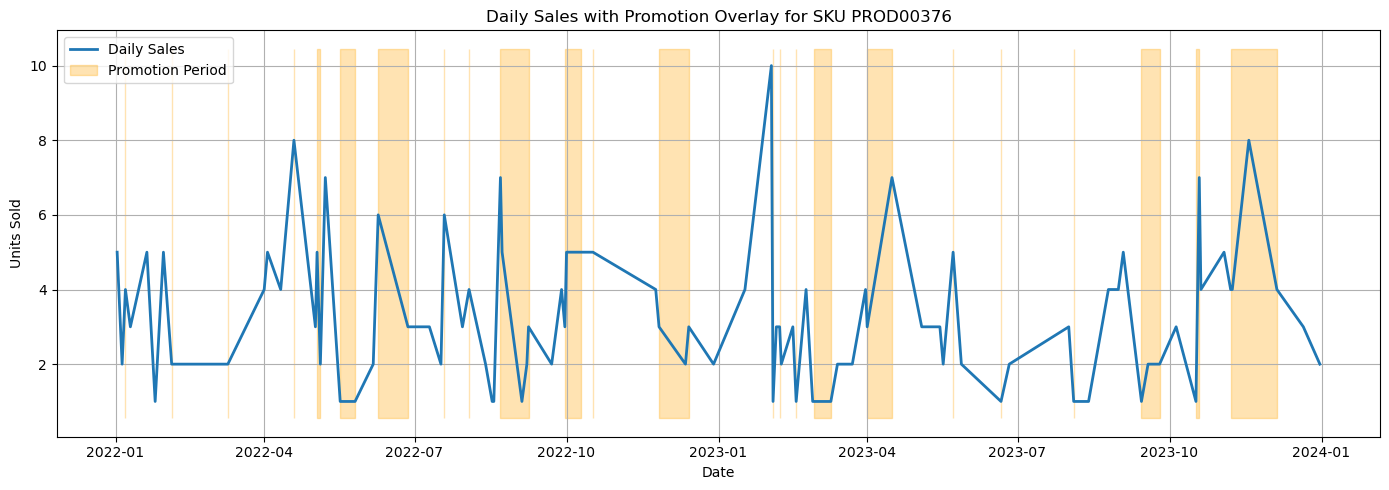

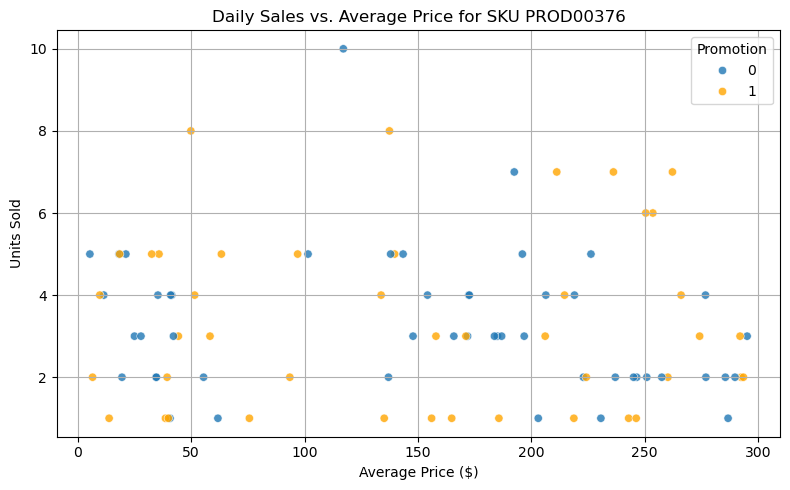

quantity  is_promotion    price
date                                       
2022-01-02         5             0   18.120
2022-01-05         2             0  276.990
2022-01-07         4             1  133.730
2022-01-10         3             0  295.180
2022-01-20         5             0   21.140
...              ...           ...      ...
2023-11-08         4             1  266.050
2023-11-18         8             1  137.405
2023-12-05         4             1  214.630
2023-12-21         3             0   27.800
2023-12-31         2             0   34.580

[93 rows x 3 columns]

In [37]:
plot_sales_with_promotions(transactions, top_skus[0])

In [38]:


def eda_daily_units_vs_comp_and_platform(transactions: pd.DataFrame, products: pd.DataFrame):
    """
    1. Scatter: Daily units sold vs. rolling 7-day avg competitor price.
    2. Bar chart: Average daily sales by platform (web, mobile app).
    """
    # Ensure timestamp is datetime
    transactions['timestamp'] = pd.to_datetime(transactions['timestamp'])
    
    # Merge in competitor price
    tx = transactions.merge(
        products[['product_id', 'avg_competitor_price']],
        on='product_id',
        how='left'
    )
    
    # Normalize to date
    tx['date'] = tx['timestamp'].dt.normalize()
    
    # --- Scatter plot data ---
    daily_units = tx.groupby('date')['quantity'].sum()
    daily_comp = tx.groupby('date')['avg_competitor_price'].mean()
    comp_ma7 = daily_comp.rolling(window=7, min_periods=1).mean()
    
    # Plot scatter
    plt.figure(figsize=(8, 6))
    plt.scatter(comp_ma7, daily_units, alpha=0.6)
    plt.xlabel('7-Day Avg Competitor Price')
    plt.ylabel('Daily Units Sold')
    plt.title('Daily Units Sold vs. Rolling 7-Day Avg Competitor Price')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # --- Bar chart data ---
    daily_platform = (
        tx
        .groupby(['date', 'platform'])['quantity']
        .sum()
        .reset_index()
    )
    avg_by_platform = daily_platform.groupby('platform')['quantity'].mean().reset_index()
    
    # Plot bar chart
    plt.figure(figsize=(6, 4))
    sns.barplot(data=avg_by_platform, x='platform', y='quantity')
    plt.xlabel('Platform')
    plt.ylabel('Avg Daily Units Sold')
    plt.title('Average Daily Sales by Platform')
    plt.tight_layout()
    plt.show()

# Function defined — call it like:
# eda_daily_units_vs_comp_and_platform(transactions, products)


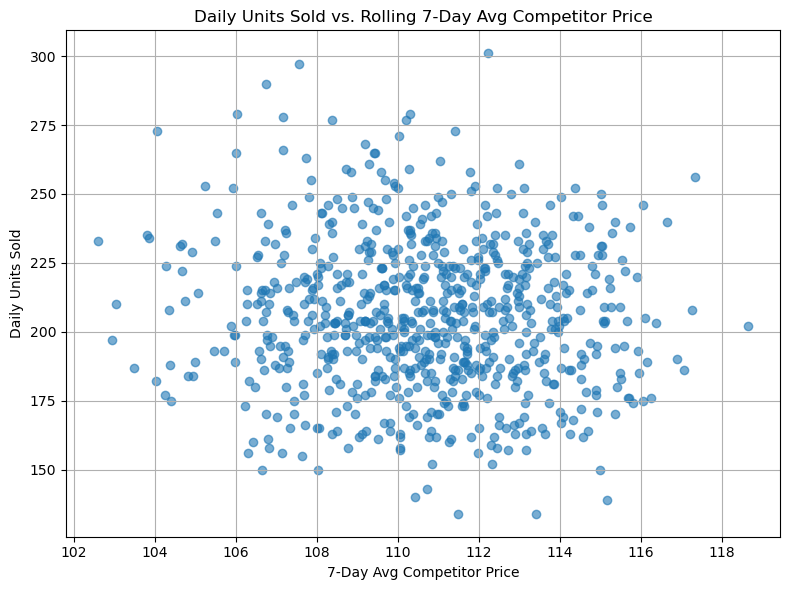

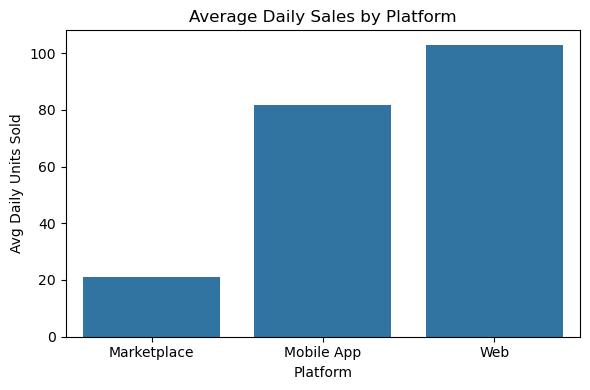

In [39]:
eda_daily_units_vs_comp_and_platform(transactions, products)

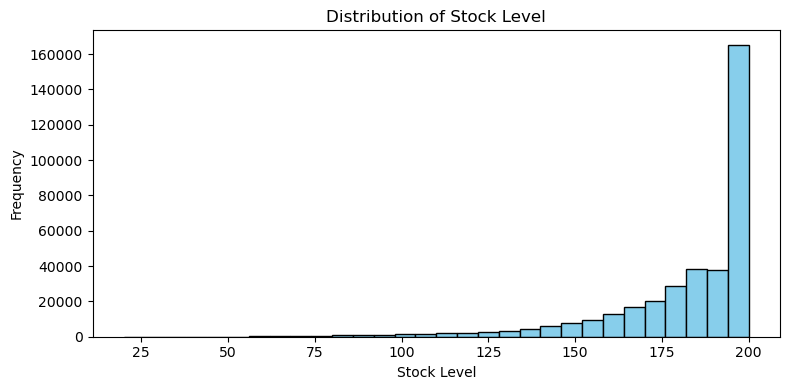

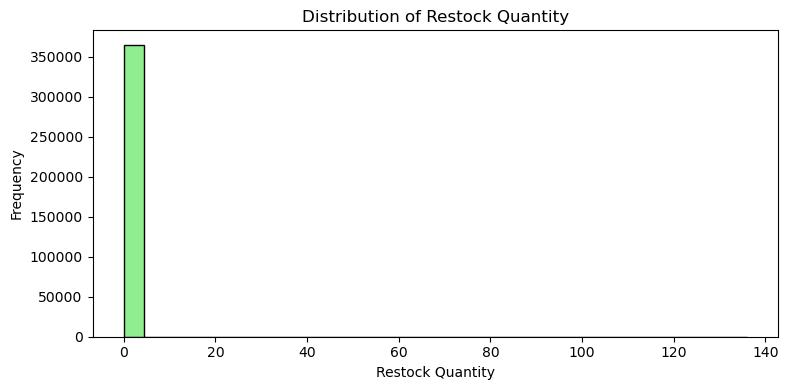

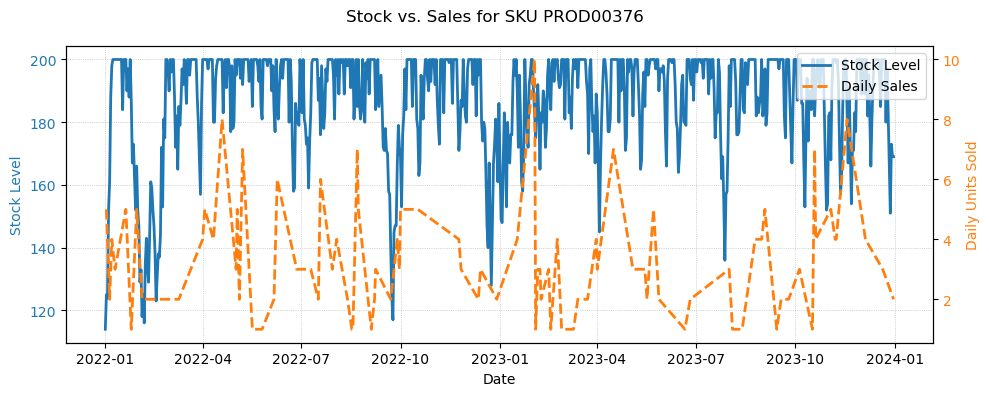

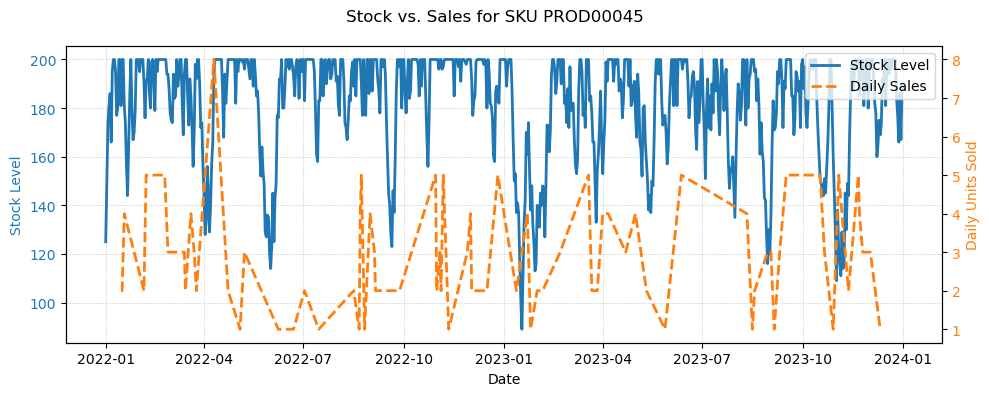

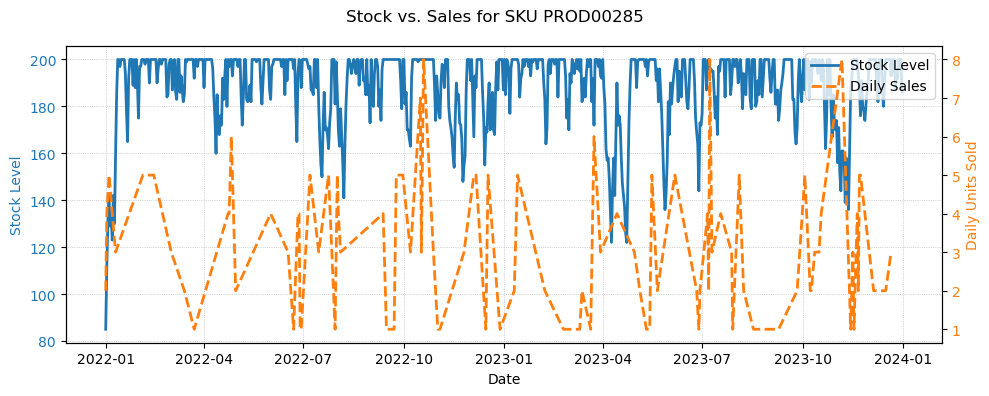

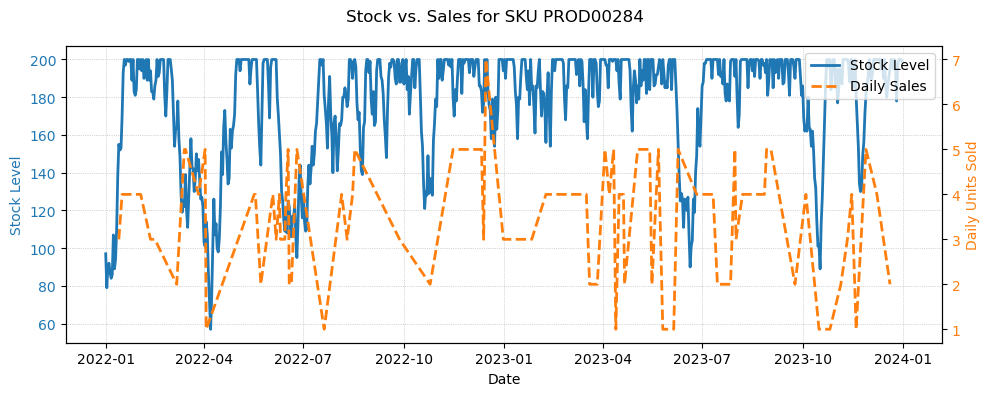

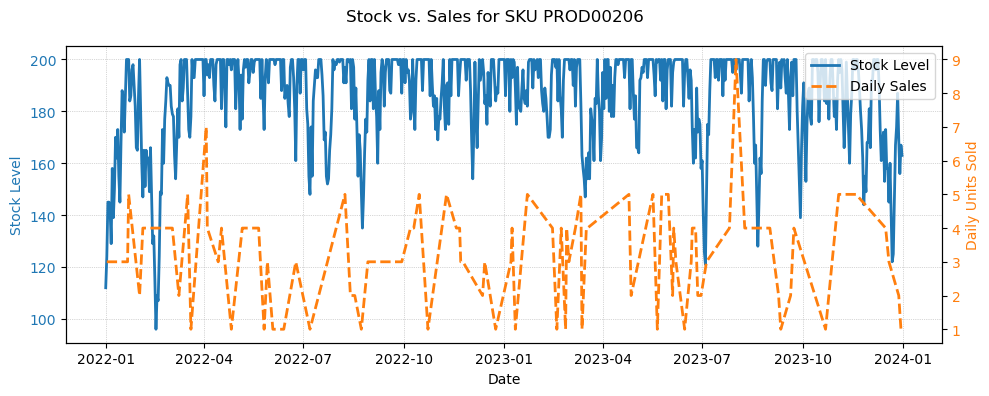

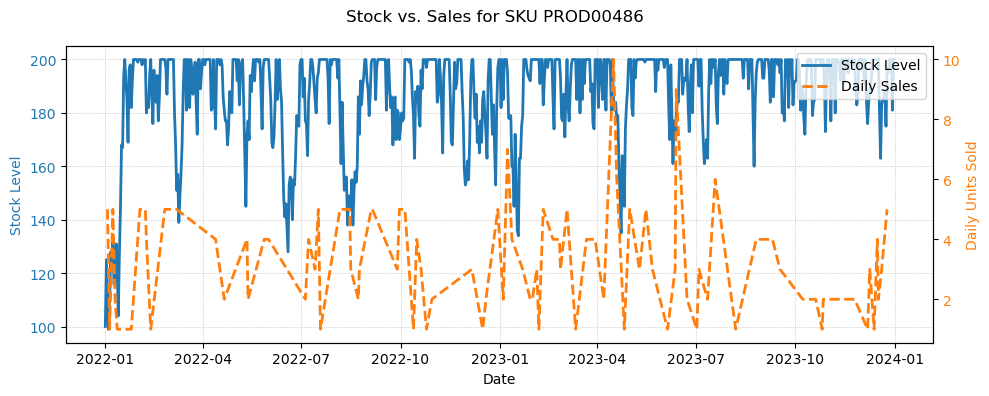

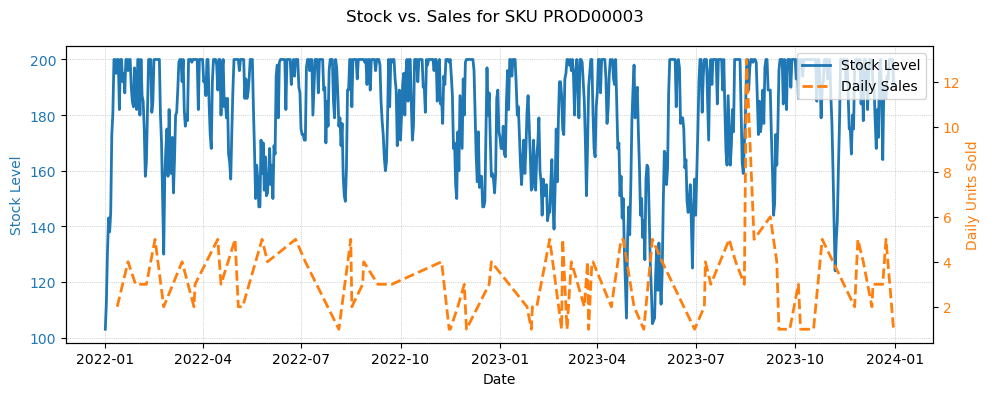

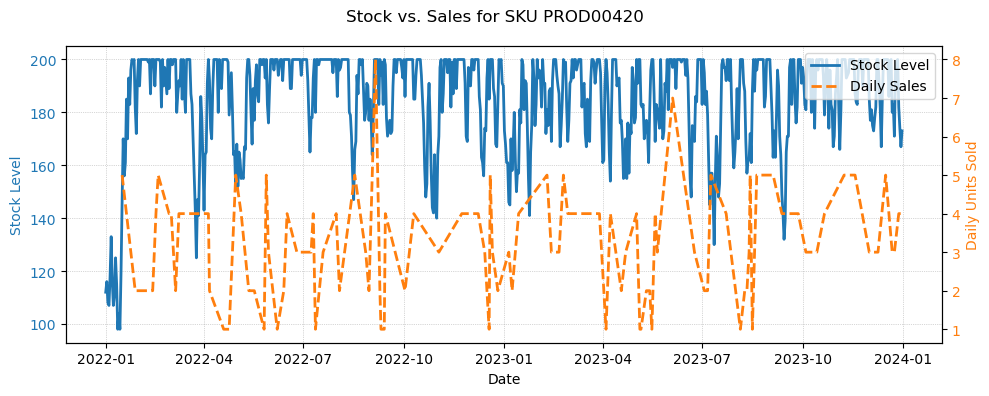

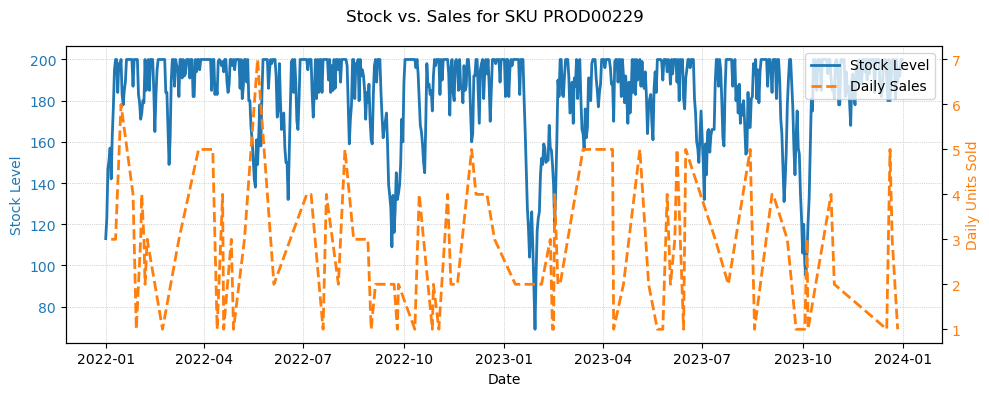

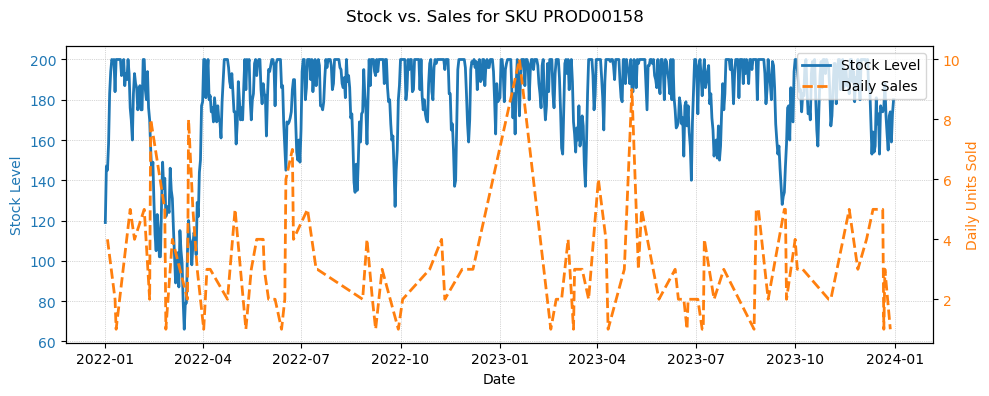

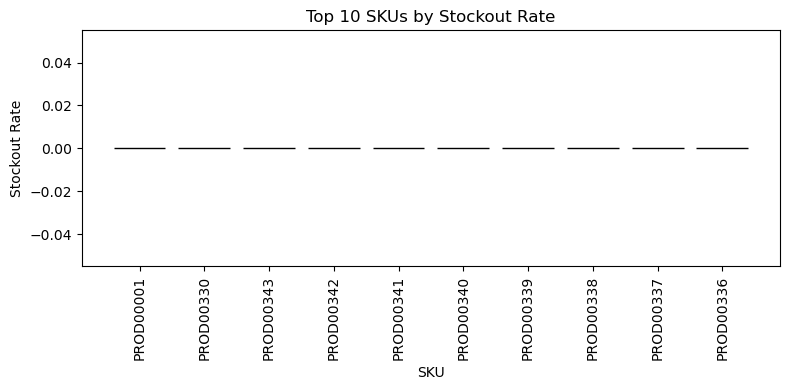

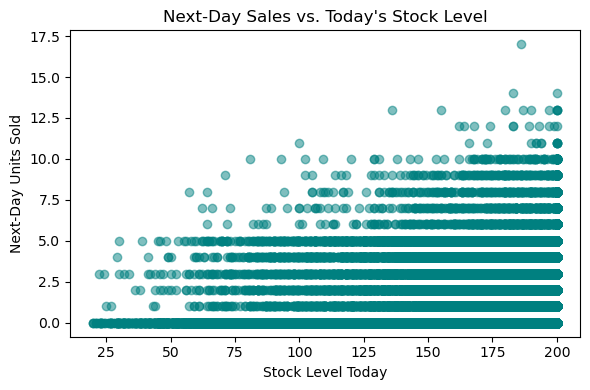

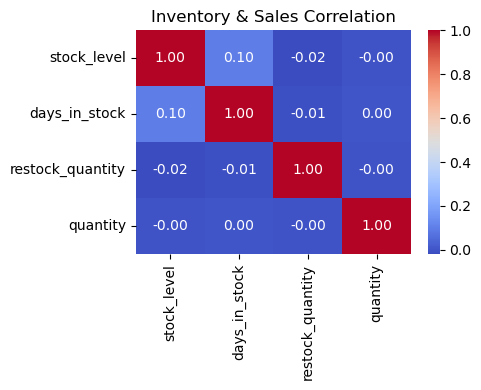

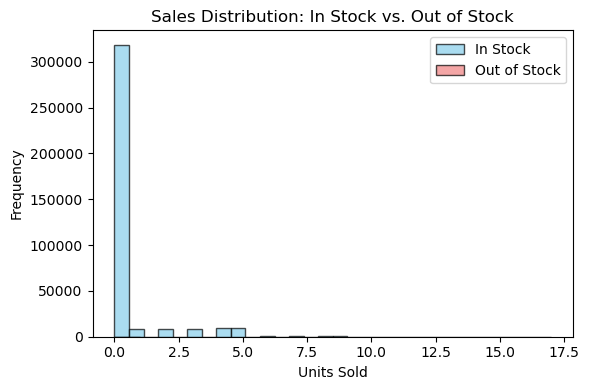

In [40]:

eda.plot_inventory_distributions(inventory)
eda.plot_stock_dynamics(inventory, transactions, top_skus)

eda.plot_stockout_rates(inventory)
eda.plot_inventory_sales_correlation(inventory, transactions)
eda.plot_censoring_diagnostics(inventory, transactions)


In [41]:
# I dont think we need to really worry about the inventory out of stock effects; if we look at the stock levels they greatly exceed the sales levels.


In [42]:
ratio_summary, overall_rate, sku_short_df = eda.validate_stock_vs_sales(transactions, inventory)

=== Stock-to-Sales Ratio Summary ===
count    3.650000e+05
mean     1.592173e+08
std      6.478482e+07
min      5.799999e+00
25%      1.600000e+08
50%      1.860000e+08
75%      2.000000e+08
max      2.000000e+08
Name: stock_to_sales, dtype: float64 

Overall proportion of days where stock < sales: 0.00%

Top 10 SKUs by proportion of days stock < sales:
product_id  prop_days_stock_short
 PROD00001                    0.0
 PROD00330                    0.0
 PROD00343                    0.0
 PROD00342                    0.0
 PROD00341                    0.0
 PROD00340                    0.0
 PROD00339                    0.0
 PROD00338                    0.0
 PROD00337                    0.0
 PROD00336                    0.0


In [43]:
# what is the max value of the inventoyry it seems to cap at 200

inventory['stock_level'].max() 

200

In [44]:
daily_sales = eda.aggregate_daily_sales(transactions)
patterns = eda.classify_demand_patterns(daily_sales)
print(patterns.head())

               p0       cv2 classification
sku                                       
2022-01-01  0.874  0.253337   Intermittent
2022-01-02  0.882  0.212547   Intermittent
2022-01-03  0.872  0.270456   Intermittent
2022-01-04  0.872  0.229592   Intermittent
2022-01-05  0.858  0.288675   Intermittent


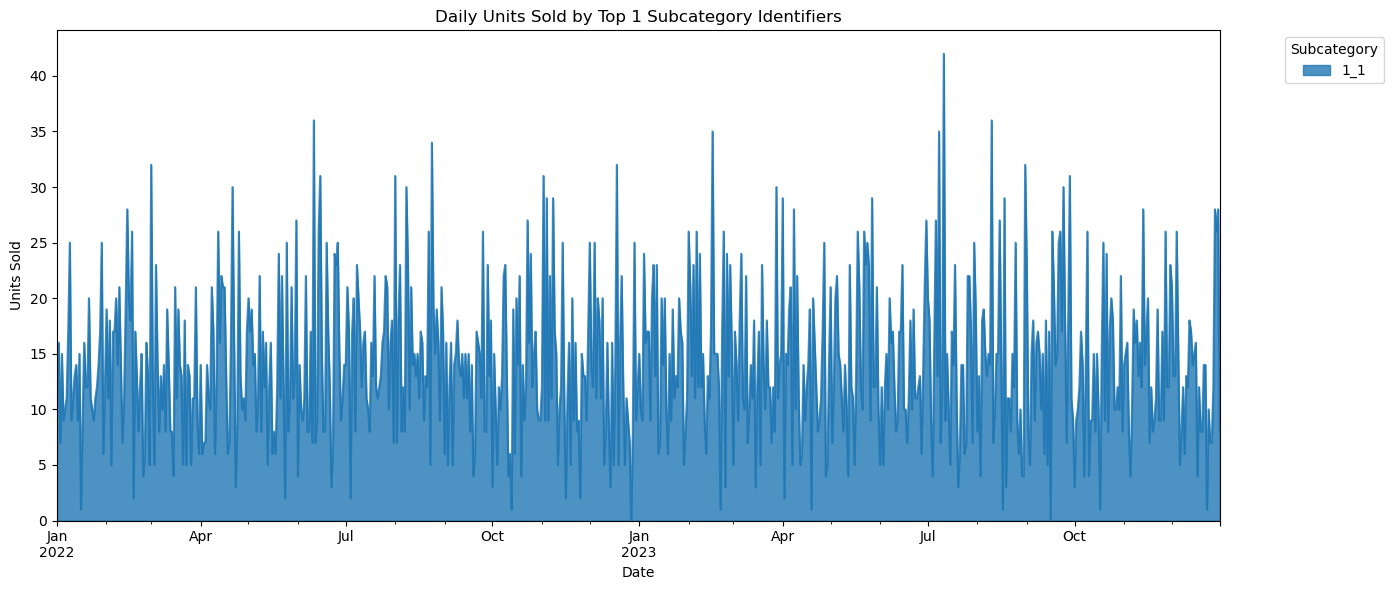

In [45]:
# Aggregate daily sales by subcategory_identifier
tx_prod = transactions.merge(
    products[['product_id', 'subcategory_identifier']],
    on='product_id',
    how='left'
)
tx_prod['date'] = tx_prod['timestamp'].dt.normalize()
daily_subcat_sales = (
    tx_prod
    .groupby(['date', 'subcategory_identifier'])['quantity']
    .sum()
    .unstack(fill_value=0)
)

# Plot: stacked area chart of top N subcategories by total sales
top_n = 1
top_subcats = daily_subcat_sales.sum().sort_values(ascending=False).head(top_n).index
plt.figure(figsize=(14, 6))
daily_subcat_sales[top_subcats].plot.area(ax=plt.gca(), stacked=True, alpha=0.8)
plt.title(f'Daily Units Sold by Top {top_n} Subcategory Identifiers')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend(title='Subcategory', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

c:\Users\jyuey\OneDrive\Documents\Python_Scripts\temple_and_webster_case_study\src\eda\eda.py:335: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(xp, yp, color='red', linewidth=2, label=f'OLS β={model.params[1]:.2f}')


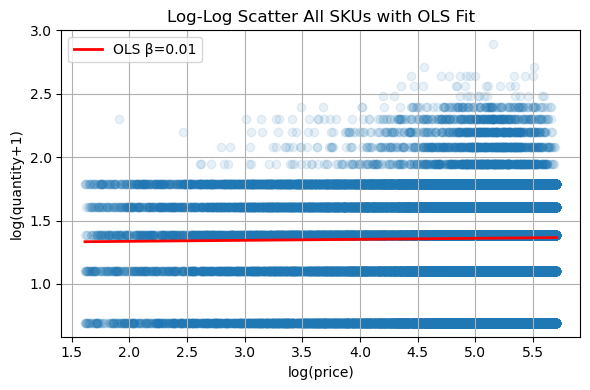

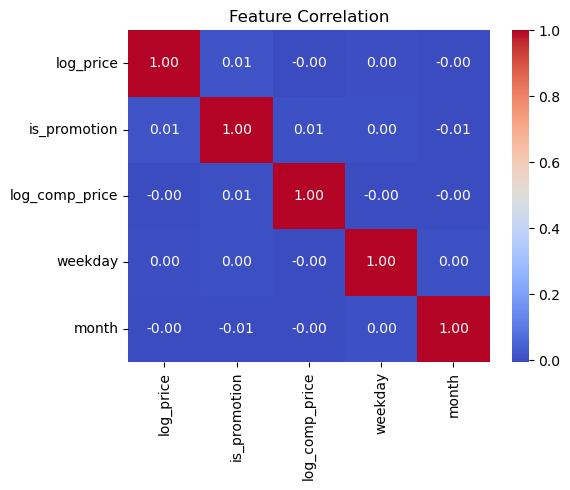

c:\Users\jyuey\OneDrive\Documents\Python_Scripts\temple_and_webster_case_study\src\eda\eda.py:379: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slopes.append({'product_id': sku, 'beta': mi.params[1]})
c:\Users\jyuey\OneDrive\Documents\Python_Scripts\temple_and_webster_case_study\src\eda\eda.py:379: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slopes.append({'product_id': sku, 'beta': mi.params[1]})
c:\Users\jyuey\OneDrive\Documents\Python_Scripts\temple_and_webster_case_study\src\eda\eda.py:379: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always

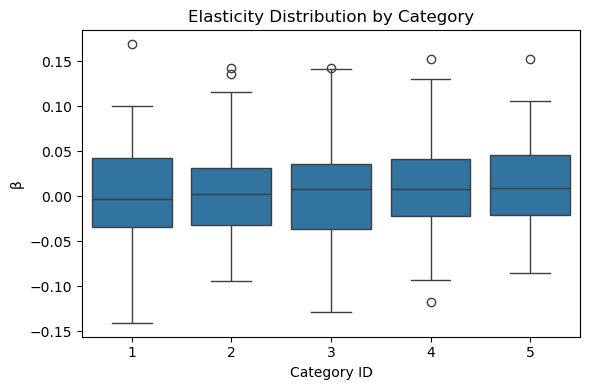

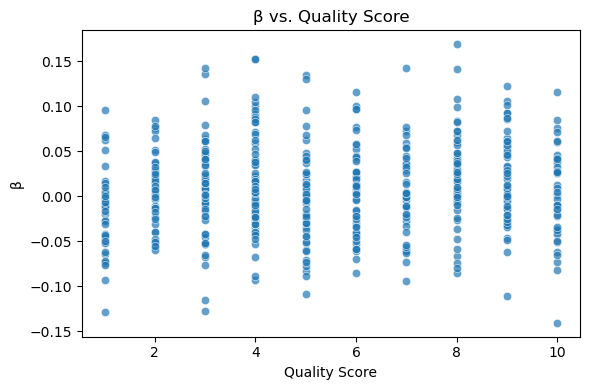

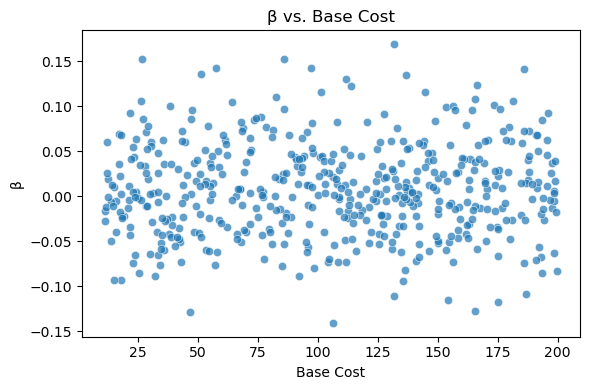

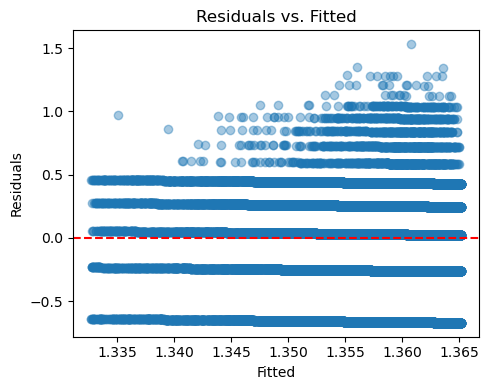

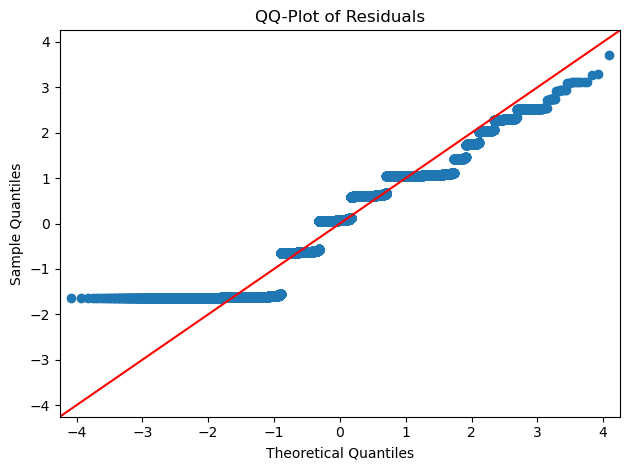

Elasticity β first year: 0.00, second year: 0.01


c:\Users\jyuey\OneDrive\Documents\Python_Scripts\temple_and_webster_case_study\src\eda\eda.py:436: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return sm.OLS(data['log_quantity'], x).fit().params[1]
c:\Users\jyuey\OneDrive\Documents\Python_Scripts\temple_and_webster_case_study\src\eda\eda.py:436: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return sm.OLS(data['log_quantity'], x).fit().params[1]
c:\Users\jyuey\OneDrive\Documents\Python_Scripts\temple_and_webster_case_study\src\eda\eda.py:436: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be 

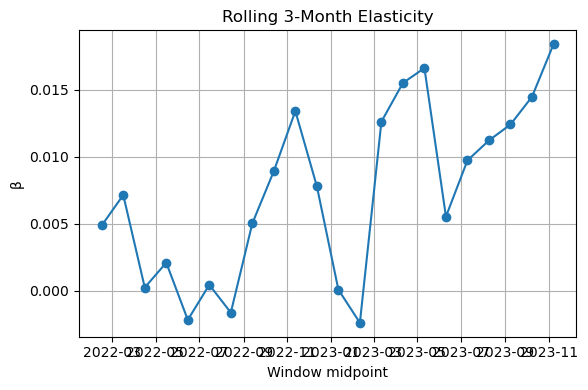

In [ ]:
# I think we have enough to start with the modelling. Need to find a ZIP model that can handle muiltiple covariates and predictors <- maybe smoething 
# similar to the one i've done in cornerstore. 
# Lets focus on the elastiicity modelling and see what we can infer. 

daily = eda.aggregate_daily_data(transactions, products)
model = eda.plot_log_log_global(daily)
vif = eda.plot_feature_correlation_and_vif(daily)
slopes = eda.compute_sku_elasticities(daily)
eda.plot_elasticity_by_category(slopes, products)
eda.plot_beta_vs_attributes(slopes, products)
eda.plot_residual_diagnostics(model)
eda.temporal_elasticity(daily)

In [46]:
# Look at subcategory price differences 

# Merge transactions with products to get subcategory info
tx_prod = transactions.merge(
    products[['product_id', 'subcategory_identifier', 'base_cost']],
    on='product_id',
    how='left'
)


In [47]:
#plot prices within subcategories
def plot_prices_by_subcategory(tx_prod: pd.DataFrame, subcat: str):
    """
    Plot price distribution for a given subcategory.
    
    Parameters
    ----------
    tx_prod : pd.DataFrame
        DataFrame with columns ['subcategory_identifier', 'price'].
    subcat : str
        Subcategory identifier to filter on.
    """
    subcat_data = tx_prod[tx_prod['subcategory_identifier'] == subcat]
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=subcat_data['price'])
    plt.title(f'Price Distribution for Subcategory: {subcat}')
    plt.xlabel('Price')
    plt.grid(True)
    plt.show()

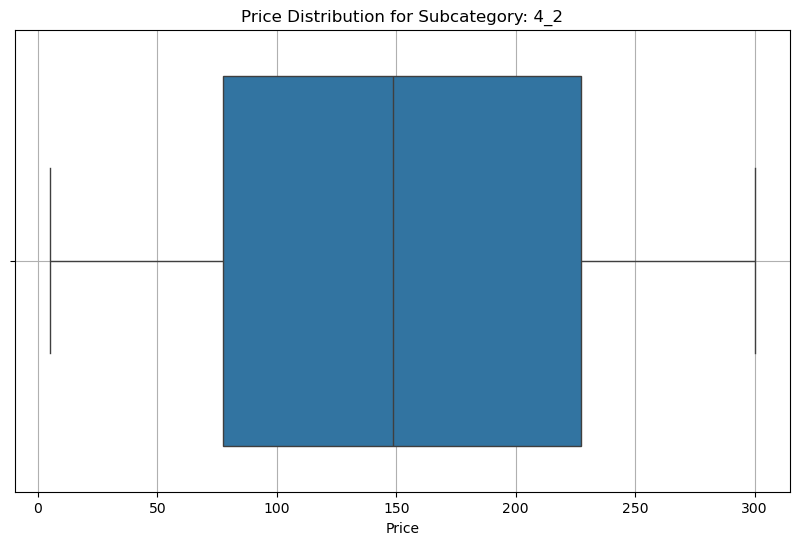

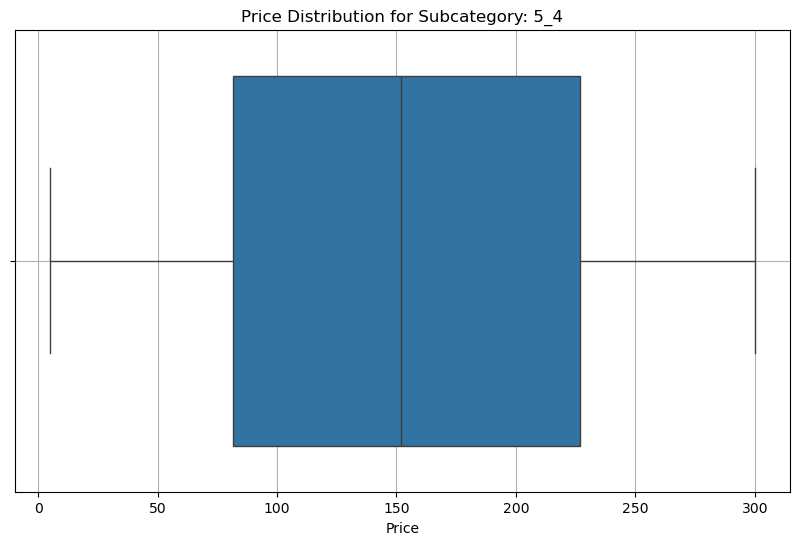

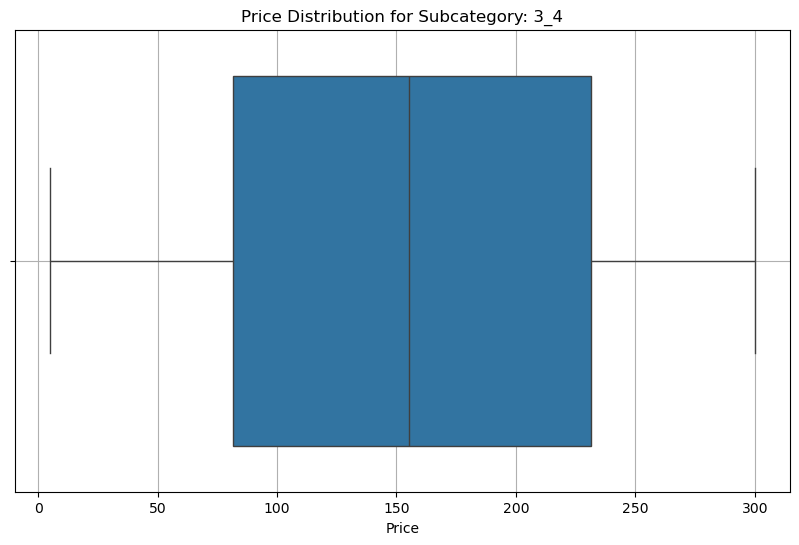

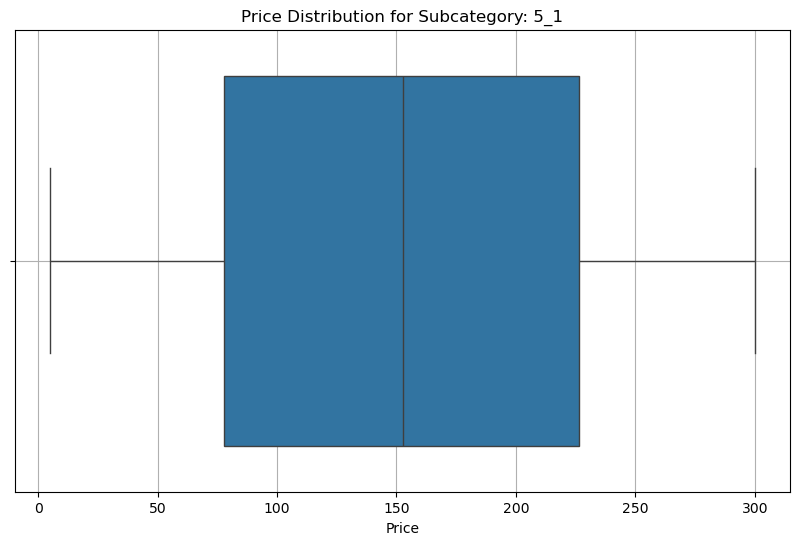

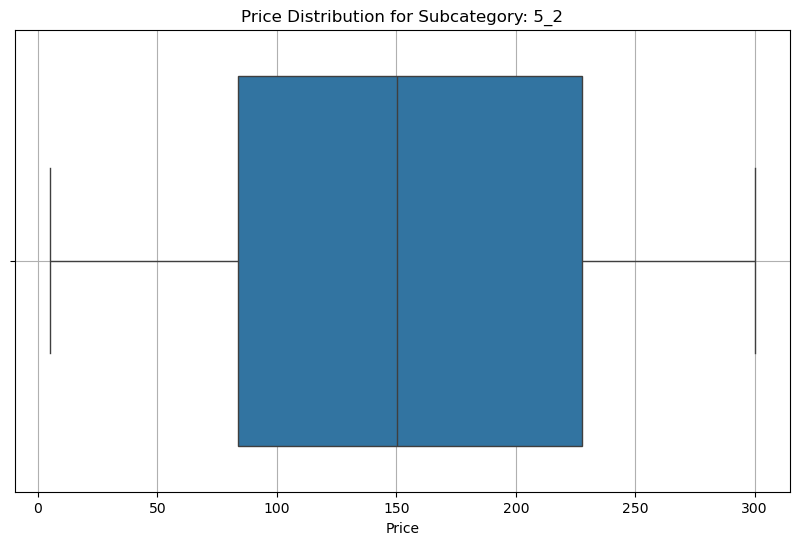

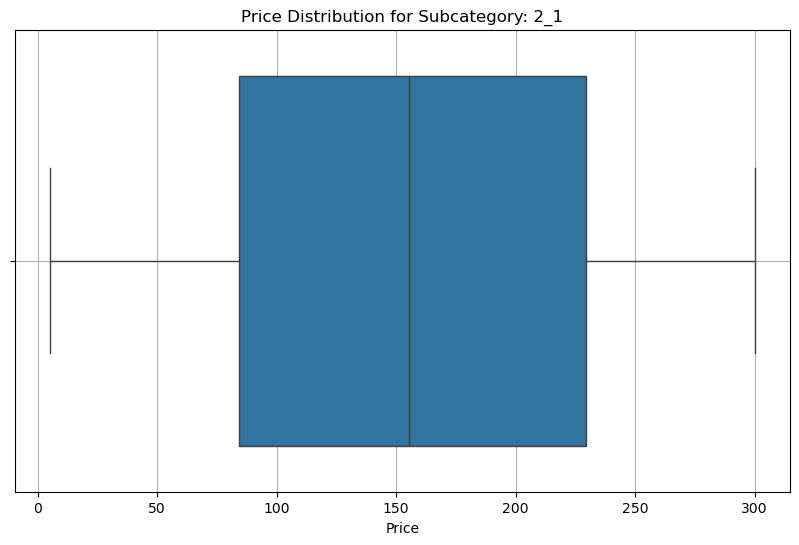

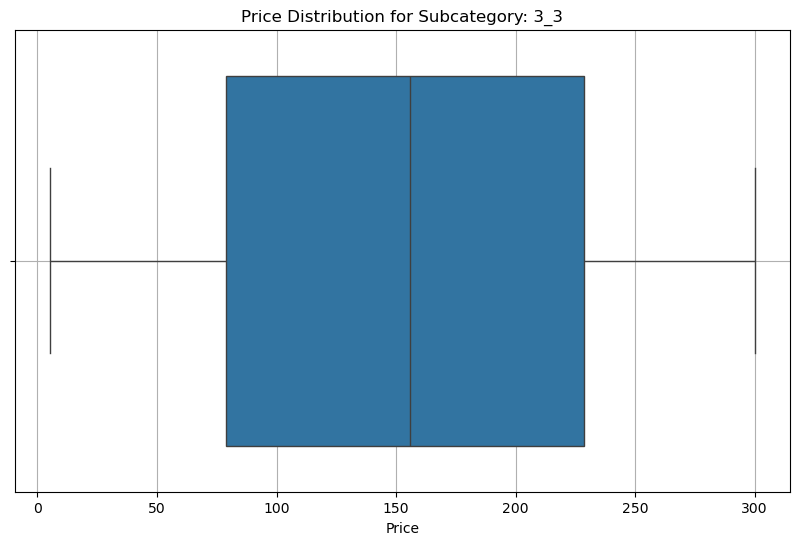

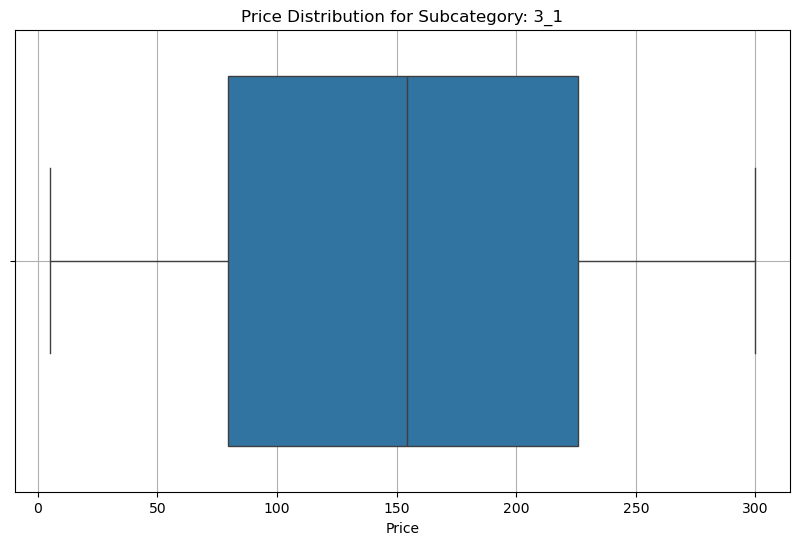

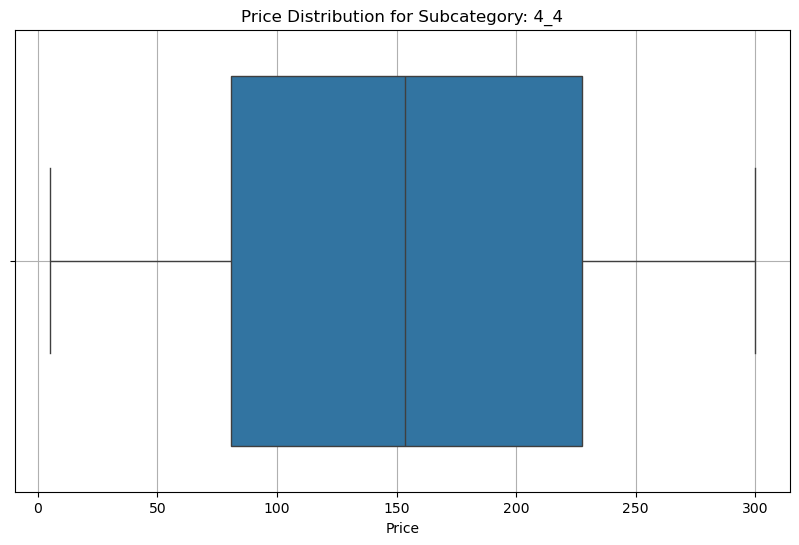

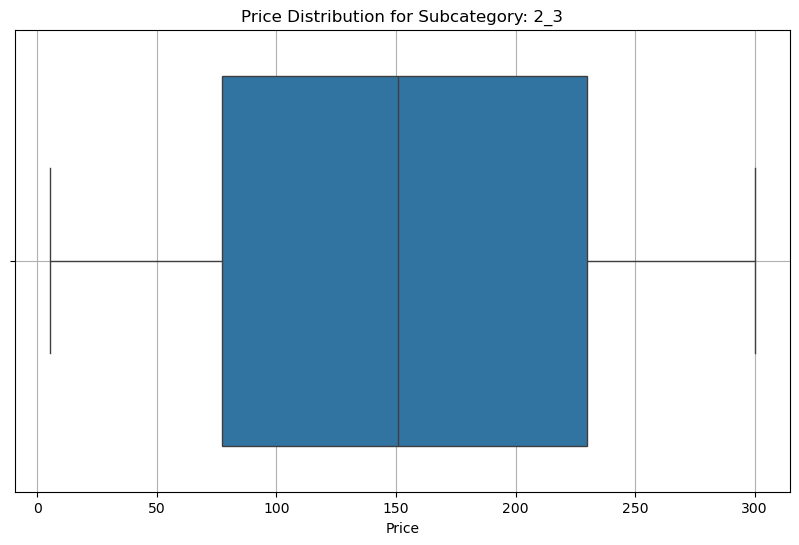

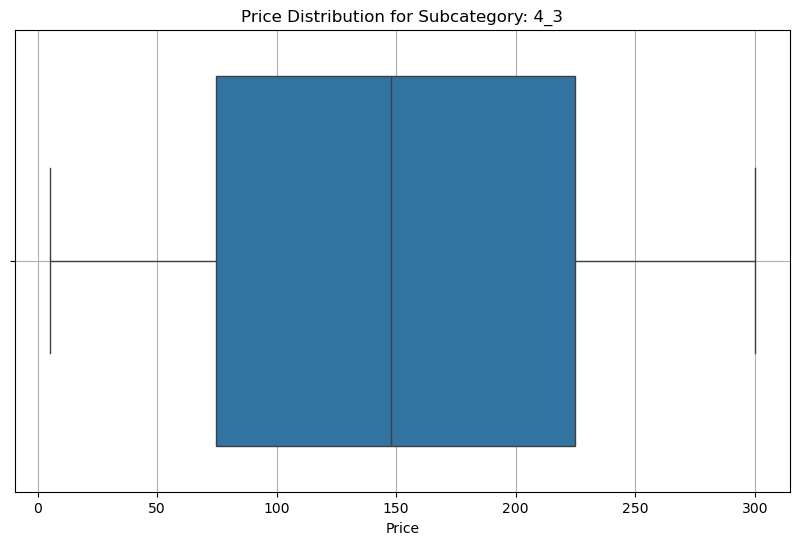

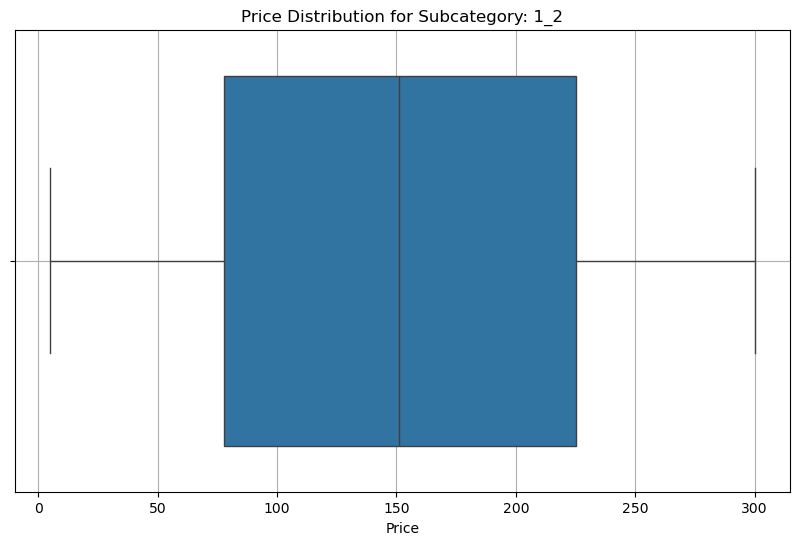

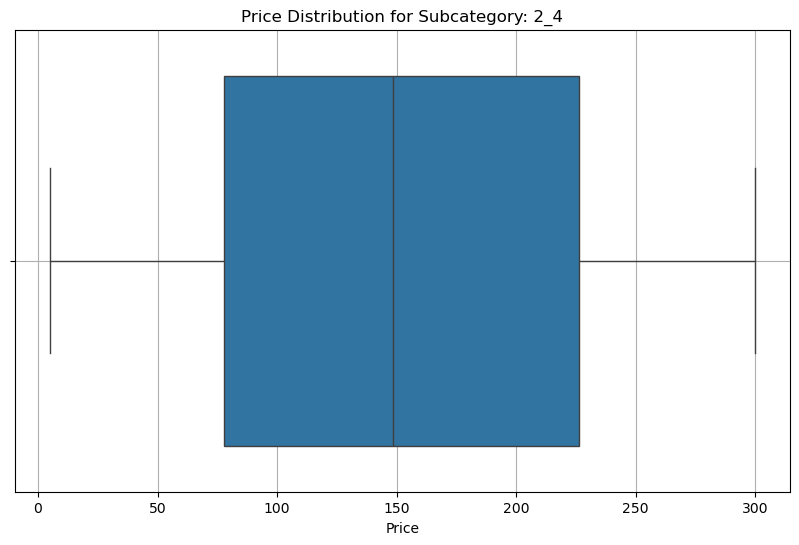

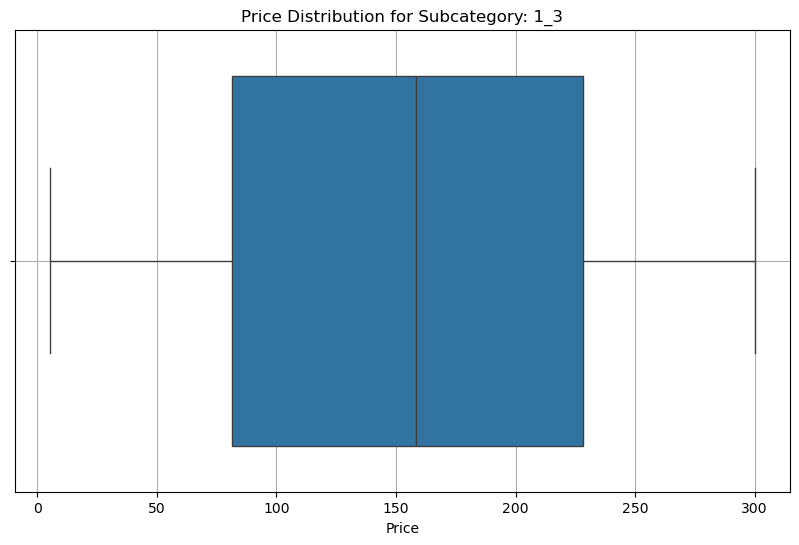

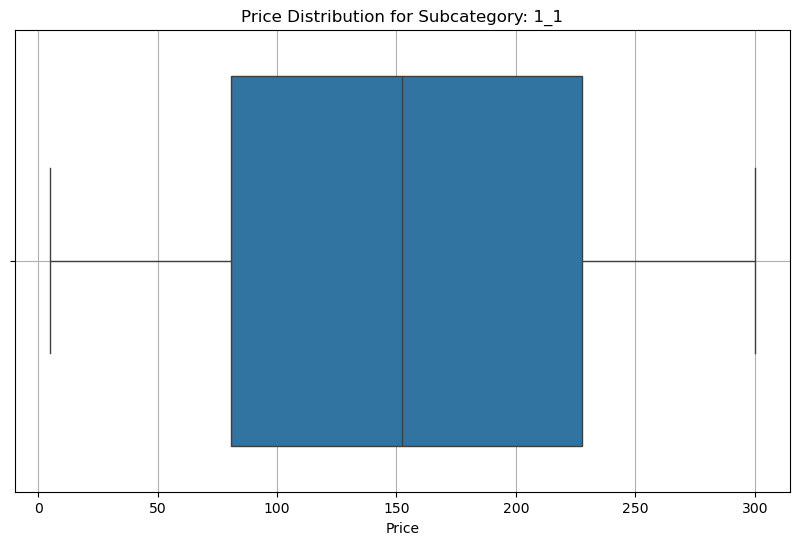

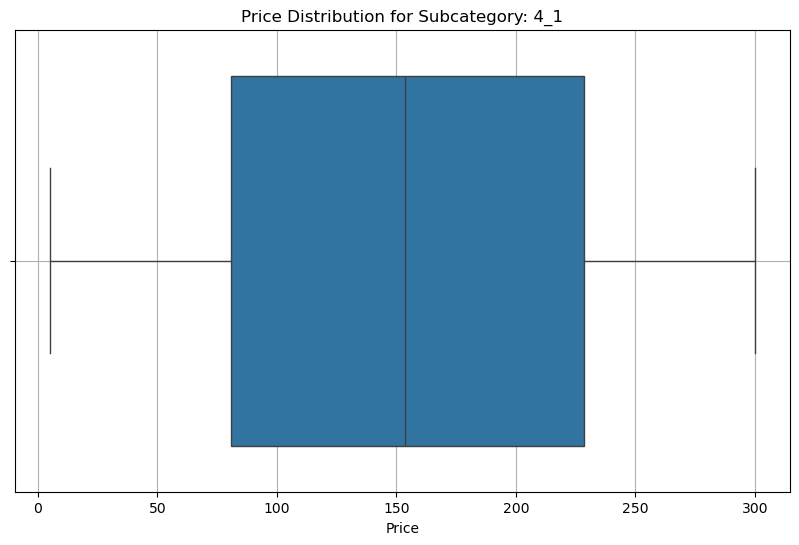

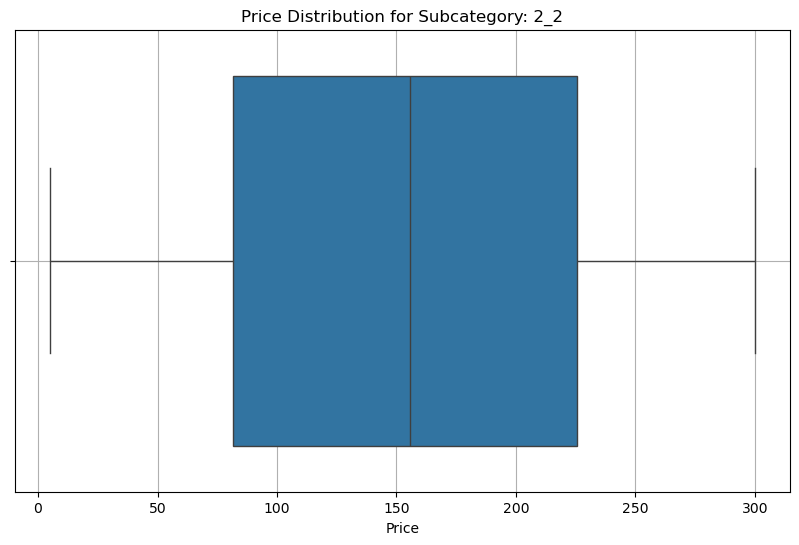

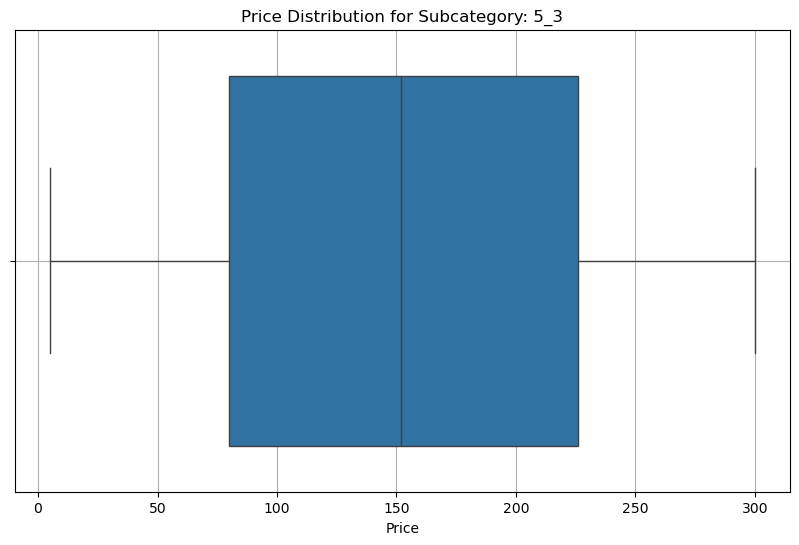

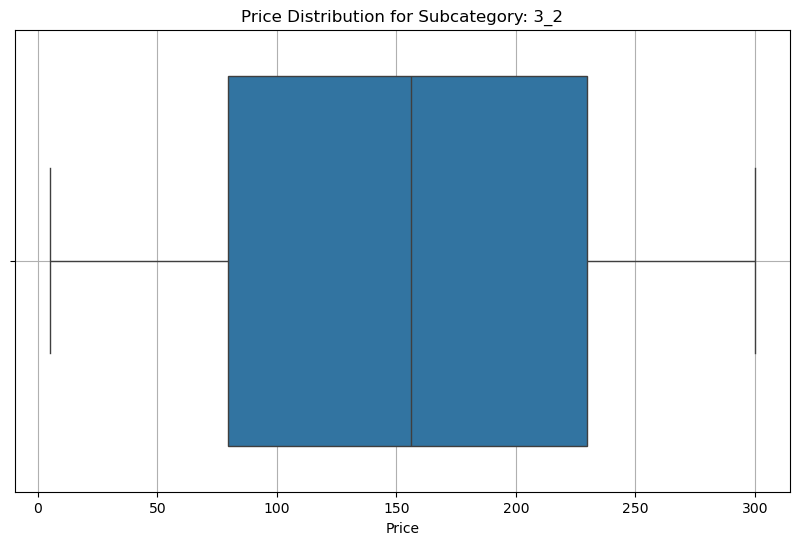

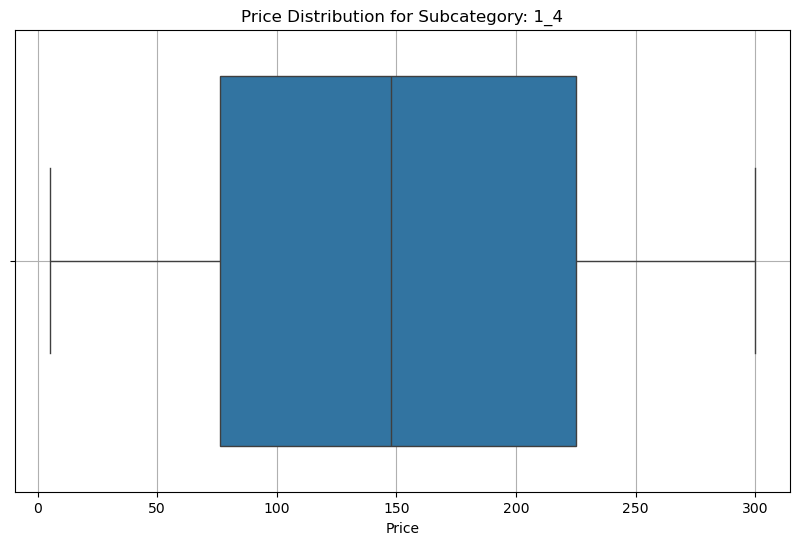

In [50]:
for i in products['subcategory_identifier'].unique():
    plot_prices_by_subcategory(tx_prod, i)



In [48]:
transactions

transaction_id product_id  timestamp   price  quantity  \
0          TXN000001  PROD00118 2022-09-25   54.58         3   
1          TXN000002  PROD00233 2022-07-02  266.63         1   
2          TXN000003  PROD00199 2023-08-18  178.76         2   
3          TXN000004  PROD00206 2022-09-29  205.39         3   
4          TXN000005  PROD00413 2022-02-09   91.81         5   
...              ...        ...        ...     ...       ...   
49995      TXN049996  PROD00046 2022-10-18  128.07         3   
49996      TXN049997  PROD00378 2023-11-15   37.22         2   
49997      TXN049998  PROD00031 2023-05-27  145.20         4   
49998      TXN049999  PROD00408 2022-10-16  233.98         4   
49999      TXN050000  PROD00375 2023-08-08   93.39         3   

                                    user_id  is_promotion promotion_type  \
0      f0b965a8-c814-4a7d-a609-be532367100d             1   No Promotion   
1      dd6b5c52-cfef-4e4d-9842-17f6807e5da7             1       Discount   
2      fc84a267-14d6-44b9-8977-37d070fb0c91             0   No Promotion   
3      99ed791f-4c44-4ce7-b0a2-921317579dc8             0   No Promotion   
4      23a9cfd3-2f00-491d-9e00-8bf13839ab14             1       Discount   
...                                     ...           ...            ...   
49995  8c128ca3-3795-4018-a142-17e5610f9344             1  Free Shipping   
49996  c2432f2b-1501-4a01-bd51-1d0c992d2cbb             0   No Promotion   
49997  ed1c3292-2fec-439f-97e0-7bfef72a13f5             0   No Promotion   
49998  52f4c618-6485-458f-8b9e-290b1f447f48             0   No Promotion   
49999  b568b32e-a97b-4083-8aa4-4138a443fb18             0        Unknown   

          platform       date  
0       Mobile App 2022-09-25  
1       Mobile App 2022-07-02  
2       Mobile App 2023-08-18  
3       Mobile App 2022-09-29  
4       Mobile App 2022-02-09  
...            ...        ...  
49995          Web 2022-10-18  
49996  Marketplace 2023-11-15  
49997   Mobile App 2023-05-27  
49998          Web 2022-10-16  
49999          Web 2023-08-08  

[50000 rows x 10 columns]

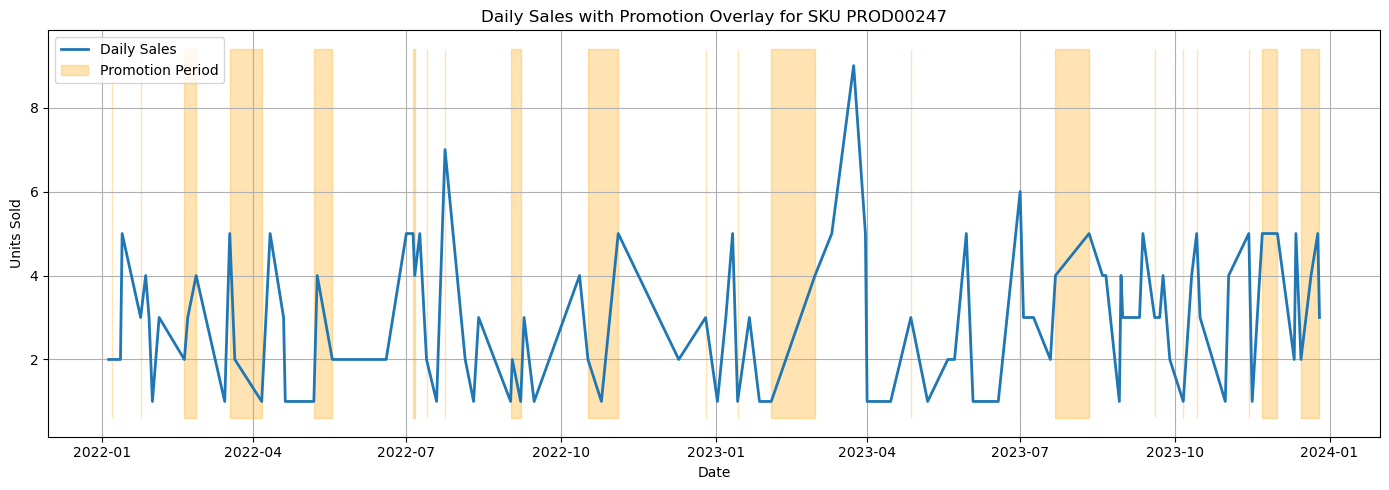

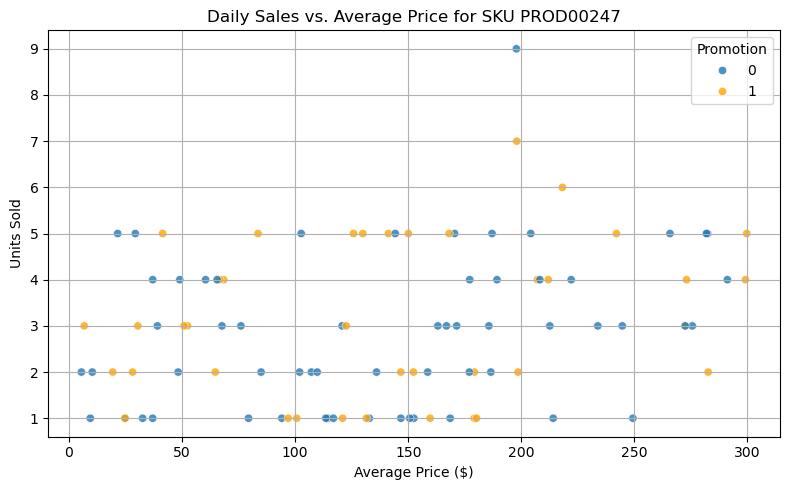

quantity  is_promotion   price
date                                      
2022-01-05         2             0  107.16
2022-01-07         2             1  152.31
2022-01-12         2             0   84.93
2022-01-13         5             0   29.32
2022-01-24         3             1  272.40
...              ...           ...     ...
2023-12-12         5             0  102.65
2023-12-15         2             1  198.54
2023-12-21         4             1  273.06
2023-12-25         5             1  299.67
2023-12-26         3             1   50.85

[99 rows x 3 columns]

In [49]:
# plot relationship between quantity and price for each product
plot_sales_with_promotions(transactions, 'PROD00247')

In [50]:
def plot_sales_with_promotions_and_bins(
    transactions: pd.DataFrame,
    sku: str,
    n_bins: int = 10
):
    """
    For a given SKU, aggregates transactions to daily metrics,
    plots:
      1. daily sales with full-height promotion shading,
      2. scatter of sales vs. average price,
      3. binned average demand vs. price curve.
    Returns both the daily DataFrame and the binned stats DataFrame.

    Parameters
    ----------
    transactions : pd.DataFrame
        Must contain ['product_id', 'timestamp', 'quantity', 'is_promotion', 'price'].
    sku : str
        The product_id to filter on.
    n_bins : int
        Number of equal-width price bins for the binned demand plot.

    Returns
    -------
    daily : pd.DataFrame
        Indexed by 'date' with columns ['quantity','is_promotion','price'].
    bin_stats : pd.DataFrame
        One row per price bin, with ['mean_price','mean_quantity','count'].
    """
    # 1. Filter and normalize timestamp
    df = transactions[transactions['product_id'] == sku].copy()
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['date'] = df['timestamp'].dt.normalize()

    # 2. Aggregate to daily metrics
    daily = (
        df.groupby('date', as_index=True)
          .agg(
              quantity=('quantity', 'sum'),
              is_promotion=('is_promotion', 'max'),
              price=('price', 'mean')
          )
          .sort_index()
    )

    # 3. Plot daily sales with promotion shading
    fig, ax = plt.subplots(figsize=(14, 5))
    ax.plot(daily.index, daily['quantity'], label='Daily Sales', linewidth=2)
    ymin, ymax = ax.get_ylim()
    ax.fill_between(
        daily.index, ymin, ymax,
        where=daily['is_promotion'] == 1,
        color='orange', alpha=0.3, step='post',
        label='Promotion'
    )
    ax.set_title(f'Daily Sales & Promotions for SKU {sku}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Units Sold')
    ax.legend(loc='upper left')
    ax.grid(True)
    plt.tight_layout()
    plt.show()

    # 4. Scatter daily sales vs. average price
    plt.figure(figsize=(8, 5))
    sns.scatterplot(
        x=daily['price'],
        y=daily['quantity'],
        hue=daily['is_promotion'],
        palette={0: 'C0', 1: 'orange'},
        alpha=0.8
    )
    plt.title(f'Daily Sales vs. Price for SKU {sku}')
    plt.xlabel('Average Price')
    plt.ylabel('Units Sold')
    plt.legend(title='Promotion')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 5. Binned average demand vs. price
    bins = np.linspace(daily['price'].min(), daily['price'].max(), n_bins + 1)
    daily['price_bin'] = pd.cut(daily['price'], bins)
    bin_stats = (
        daily.groupby('price_bin')
             .agg(
                 mean_price=('price', 'mean'),
                 mean_quantity=('quantity', 'mean'),
                 count=('quantity', 'size')
             )
             .dropna()
             .reset_index(drop=True)
    )

    plt.figure(figsize=(8, 5))
    sns.lineplot(
        x='mean_price',
        y='mean_quantity',
        data=bin_stats,
        marker='o'
    )
    plt.title(f'Binned Demand vs. Price for SKU {sku}')
    plt.xlabel('Mean Price per Bin')
    plt.ylabel('Mean Units Sold')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return daily, bin_stats

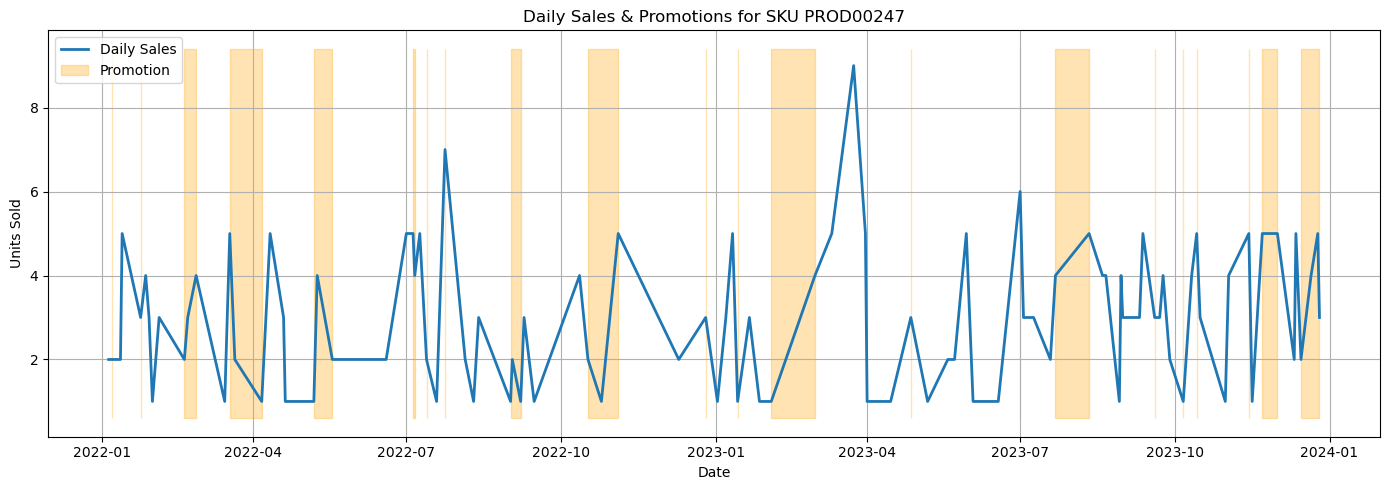

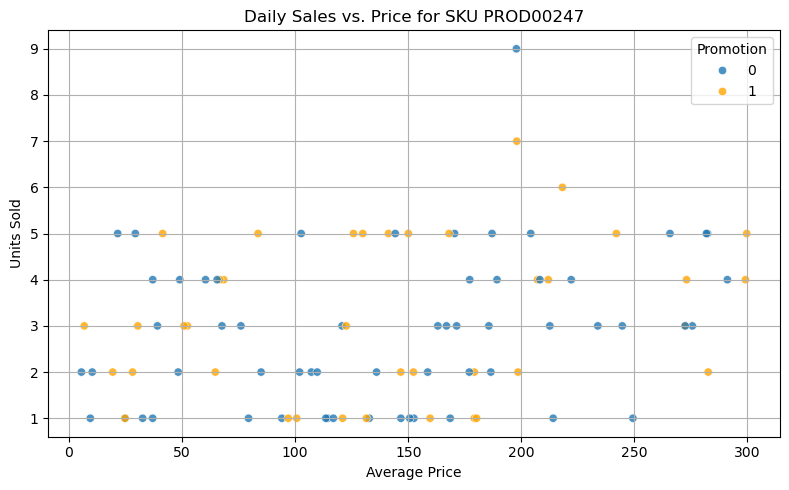

C:\Users\jyuey\AppData\Local\Temp\ipykernel_13256\874255451.py:85: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily.groupby('price_bin')


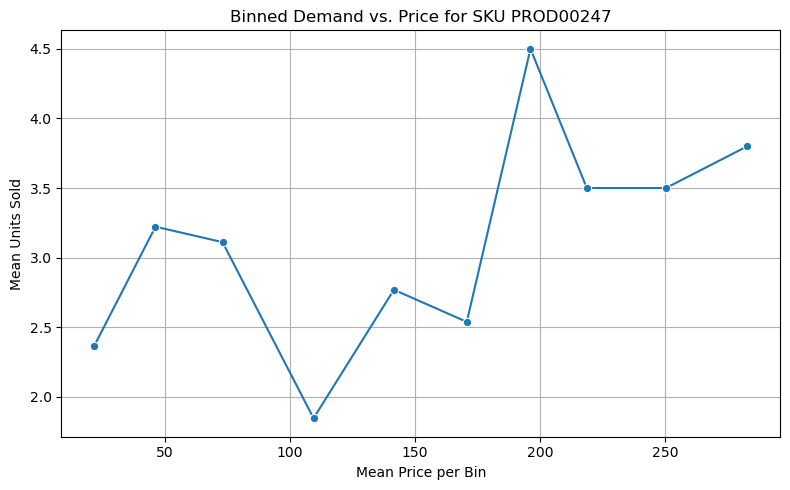

(            quantity  is_promotion   price           price_bin
 date                                                          
 2022-01-05         2             0  107.16   (93.737, 123.156]
 2022-01-07         2             1  152.31  (123.156, 152.575]
 2022-01-12         2             0   84.93    (64.318, 93.737]
 2022-01-13         5             0   29.32      (5.48, 34.899]
 2022-01-24         3             1  272.40   (270.251, 299.67]
 ...              ...           ...     ...                 ...
 2023-12-12         5             0  102.65   (93.737, 123.156]
 2023-12-15         2             1  198.54  (181.994, 211.413]
 2023-12-21         4             1  273.06   (270.251, 299.67]
 2023-12-25         5             1  299.67   (270.251, 299.67]
 2023-12-26         3             1   50.85    (34.899, 64.318]
 
 [99 rows x 4 columns],
    mean_price  mean_quantity  count
 0   21.562727       2.363636     11
 1   46.141111       3.222222      9
 2   72.972778       3.111111  

In [51]:
plot_sales_with_promotions_and_bins(transactions, 'PROD00247')